In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold

import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error


from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from lightgbm import LGBMClassifier 
# import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_auc_score
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew, boxcox
from scipy.stats import probplot
from scipy.stats.mstats import winsorize

import optuna
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install optuna

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
df = pd.read_csv('creditcard.csv')

# Step 2: Split the DataFrame into training and testing sets
# Set a seed for reproducibility
np.random.seed(42)

# Generate random indices for splitting
indices = np.random.permutation(df.index)
split_ratio = 0.8  # 80% training, 20% testing

# Calculate the split index
split_index = int(len(indices) * split_ratio)

# Split the indices into training and testing sets
train_indices, test_indices = indices[:split_index], indices[split_index:]

# Step 3: Create training and testing DataFrames
df_train = df.loc[train_indices]
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_test = df.loc[test_indices]
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

In [12]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 43428 to 233541
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    227845 non-null  float64
 1   v1      227845 non-null  float64
 2   v2      227845 non-null  float64
 3   v3      227845 non-null  float64
 4   v4      227845 non-null  float64
 5   v5      227845 non-null  float64
 6   v6      227845 non-null  float64
 7   v7      227845 non-null  float64
 8   v8      227845 non-null  float64
 9   v9      227845 non-null  float64
 10  v10     227845 non-null  float64
 11  v11     227845 non-null  float64
 12  v12     227845 non-null  float64
 13  v13     227845 non-null  float64
 14  v14     227845 non-null  float64
 15  v15     227845 non-null  float64
 16  v16     227845 non-null  float64
 17  v17     227845 non-null  float64
 18  v18     227845 non-null  float64
 19  v19     227845 non-null  float64
 20  v20     227845 non-null  float64
 21  v21     227

In [13]:
df_train

time         v1        v2         v3        v4         v5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   
...          ...        ...       ...        ...       ...        ...   
166978  118418.0   0.039574  0.747010   0.098041 -0.806212   0.615727   
251118  155226.0  -2.169007  1.869922  -1.706489 -0.672649   0.271257   
13232    23276.0  -1.636799 -0.288001   3.044085  2.155079  -0.764045   
49834    44233.0   1.239340 -0.152563  -0.103219 -0.000806  -0.146956   
233541  147606.0   0.033929  0.662453  -1.994229 -1.740701   3.566016   

              v6         v7        v8        v9  ...       v21       v22  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ...  1.190739 -1.127670   
49906   1.015887  -0.524379  0.224060  0.899746  ... -0.213436 -0.942525   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.102398  0.168269   
276481 -0.630647   0.276990  0.586025 -0.484715  ...  0.358932  0.873663   
278846 -0.956571   0.043241 -0.160746  0.363241  ... -0.238644 -0.616400   
...          ...        ...       ...       ...  ...       ...       ...   
166978 -0.548374   0.838212  0.020500 -0.136691  ... -0.251461 -0.619013   
251118 -1.057522   0.184034  0.578133  1.108769  ... -0.491087 -1.070523   
13232   0.924178  -0.724145  0.297774  2.620092  ... -0.193612  0.515240   
49834  -0.168999  -0.112986  0.119254  0.257984  ... -0.050855 -0.076214   
233541  3.065675   1.007304  0.322236 -0.275069  ...  0.164302  0.502520   

             v23       v24       v25       v26       v27       v28  amount  \
43428  -2.358579  0.673461 -1.413700 -0.462762 -2.018575 -1.042804  364.19   
49906  -0.526819 -1.156992  0.311211 -0.746647  0.040996  0.102038  520.12   
29474  -0.166639 -0.810250  0.505083 -0.232340  0.011409  0.004634   31.00   
276481 -0.178642 -0.017171 -0.207392 -0.157756 -0.237386  0.001934    1.50   
278846  0.347045  0.061561 -0.360196  0.174730 -0.078043 -0.070571    0.89   
...          ...       ...       ...       ...       ...       ...     ...   
166978  0.005320 -0.523766 -0.486633  0.153365  0.237510  0.080317    1.98   
251118  0.048976  0.463935 -0.252957  0.094892  0.081812  0.103395    8.99   
13232   0.016859  0.388790 -0.112184 -0.140346 -0.021988  0.143122   78.13   
49834  -0.086878 -0.249568  0.432091  1.128364 -0.092260 -0.027886    2.00   
233541 -0.263454  0.773146  0.128717  0.594012 -0.626922 -0.267547    0.76   

        class  
43428       1  
49906       0  
29474       0  
276481      0  
278846      0  
...       ...  
166978      0  
251118      0  
13232       0  
49834       0  
233541      0  

[227845 rows x 31 columns]

In [14]:
target='class'

In [15]:
print(df_train.skew())
print(df_test.skew())

time      -0.037202
v1        -3.206639
v2        -4.101169
v3        -2.137282
v4         0.657297
v5        -0.559598
v6         1.291542
v7        -0.660007
v8        -8.898571
v9         0.561987
v10        1.176900
v11        0.355070
v12       -2.250899
v13        0.058608
v14       -1.993147
v15       -0.312339
v16       -1.098615
v17       -3.749948
v18       -0.250386
v19        0.109916
v20       -1.906369
v21        3.887705
v22       -0.213684
v23       -6.959601
v24       -0.550436
v25       -0.426091
v26        0.579564
v27       -3.098919
v28        9.129146
amount    12.107723
class     24.202400
dtype: float64
time      -0.029034
v1        -3.559444
v2        -6.391001
v3        -2.634257
v4         0.751067
v5        -8.510178
v6         3.764096
v7        12.801923
v8        -6.930597
v9         0.525585
v10        1.227624
v11        0.362015
v12       -2.380577
v13        0.091731
v14       -2.003230
v15       -0.292532
v16       -1.109671
v17       -4.198063
v18  

In [16]:
print(df_train.corr()[target].sort_values(ascending=False))
print('-------------- \n')
print(df_test.corr()[target].sort_values(ascending=False))

class     1.000000
v11       0.152038
v4        0.130841
v2        0.091639
v21       0.044132
v19       0.032091
v20       0.019955
v8        0.017964
v27       0.016463
v28       0.010169
amount    0.006672
v25       0.004291
v26       0.003324
v22      -0.001269
v23      -0.003075
v15      -0.003902
v13      -0.005438
v24      -0.007920
time     -0.012185
v6       -0.044112
v5       -0.095407
v9       -0.097208
v1       -0.103536
v18      -0.108364
v7       -0.189865
v16      -0.192785
v3       -0.193059
v10      -0.216811
v12      -0.255999
v14      -0.298782
v17      -0.320053
Name: class, dtype: float64
-------------- 

class     1.000000
v11       0.165784
v4        0.143472
v2        0.090037
v19       0.045046
v8        0.027372
v21       0.025809
v27       0.021639
v20       0.020584
v26       0.008774
v22       0.008730
v28       0.007310
amount    0.002386
v25      -0.000424
v23      -0.001166
v13      -0.001267
v24      -0.004559
v15      -0.005471
time     -0.012842
v6   

In [17]:
def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        before_df=pd.DataFrame(DF[col], columns=[col])

        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
#             sns.distplot(before_df[col]);
#             fig = plt.figure()
#             res = stats.probplot(before_df[col], plot=plt)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                sns.distplot(DF[col]);
                fig = plt.figure()
                res = stats.probplot(DF[col], plot=plt)
                

                plt.title('After')
                plt.xlabel('Theoretical Quantiles')
                plt.ylabel('Ordered Values')
                
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF

In [18]:
num_featuers=df_train.columns.tolist()
num_featuers.remove(target)


 ------------------------------------------------------

 'v1' had 'negative' skewness of -3.21

 Transformation yielded skewness of -0.13


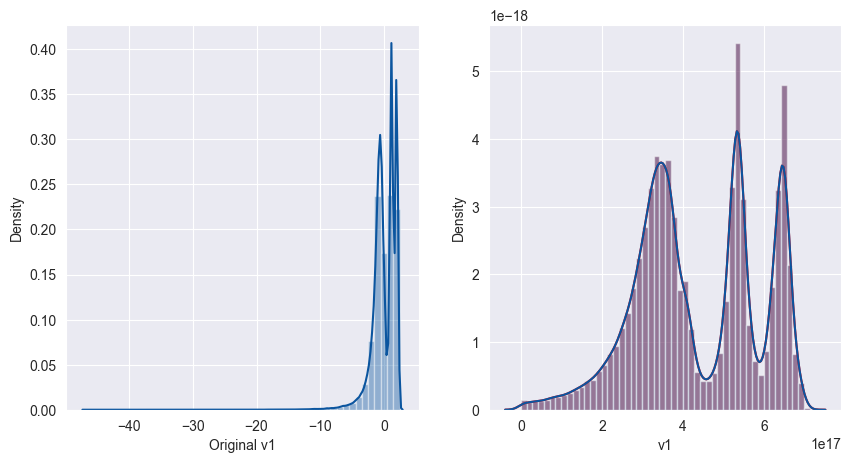

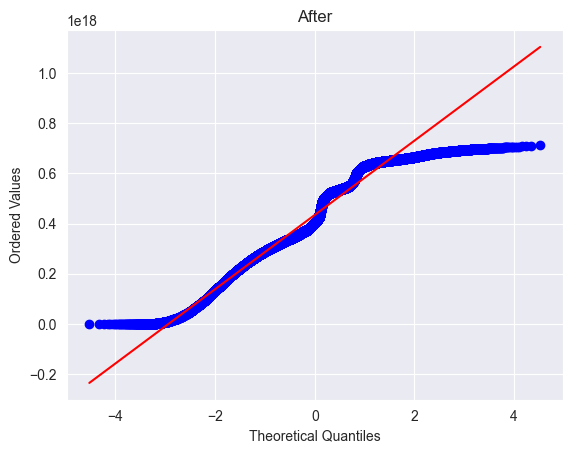


 ------------------------------------------------------

 'v2' had 'negative' skewness of -4.10

 Transformation yielded skewness of 0.82


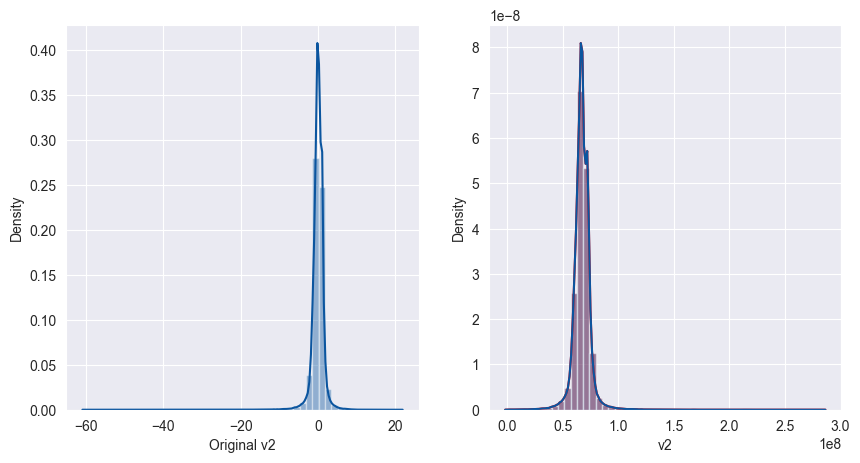

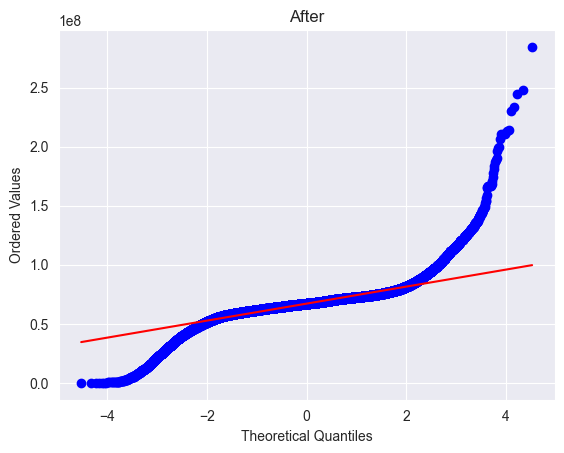


 ------------------------------------------------------

 'v3' had 'negative' skewness of -2.14

 Transformation yielded skewness of 0.01


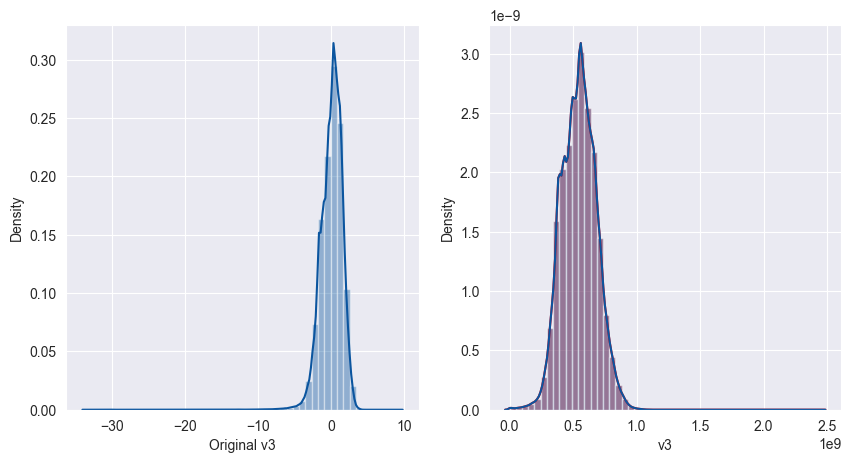

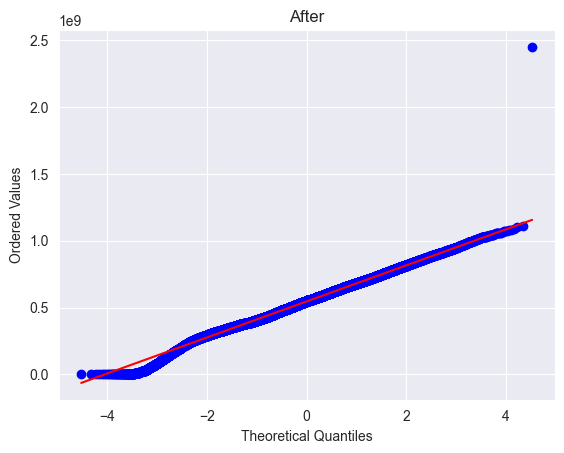


 ------------------------------------------------------

 'v4' had 'positive' skewness of 0.66

 Transformation yielded skewness of 0.07


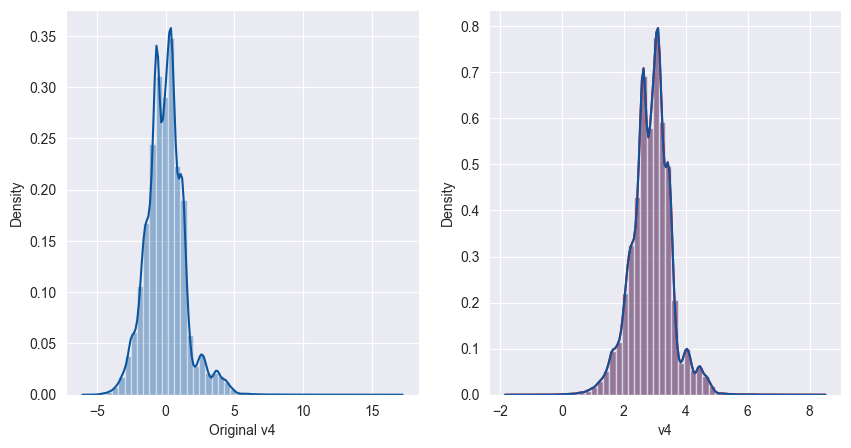

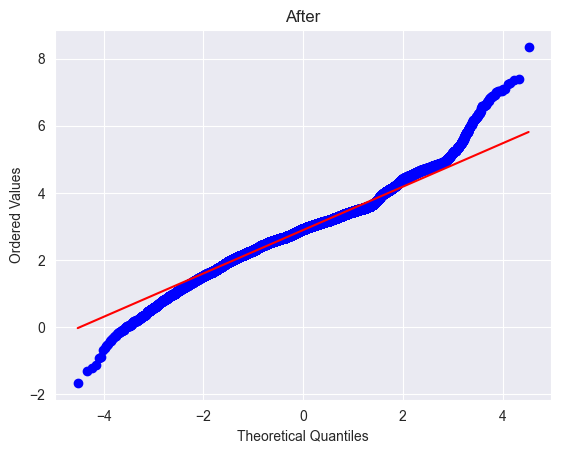


 ------------------------------------------------------

 'v5' had 'negative' skewness of -0.56

 Transformation yielded skewness of 0.72


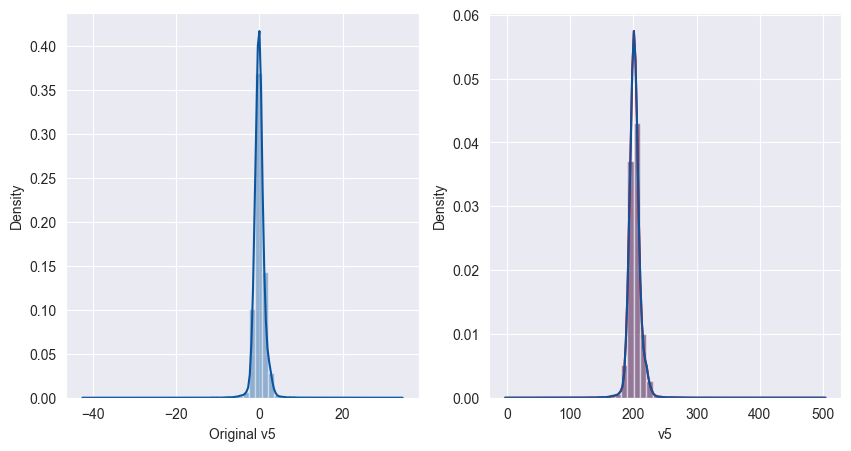

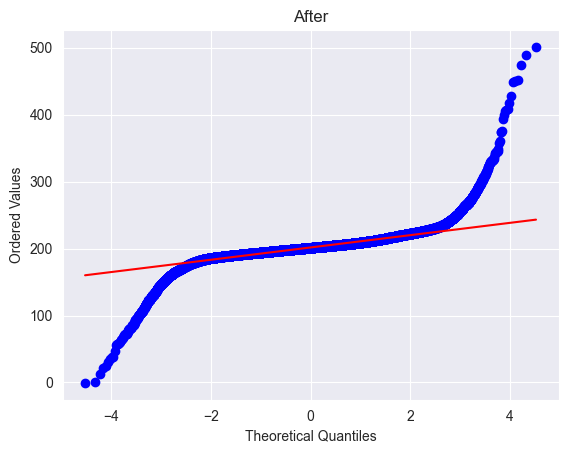


 ------------------------------------------------------

 'v6' had 'positive' skewness of 1.29

 Transformation yielded skewness of 0.40


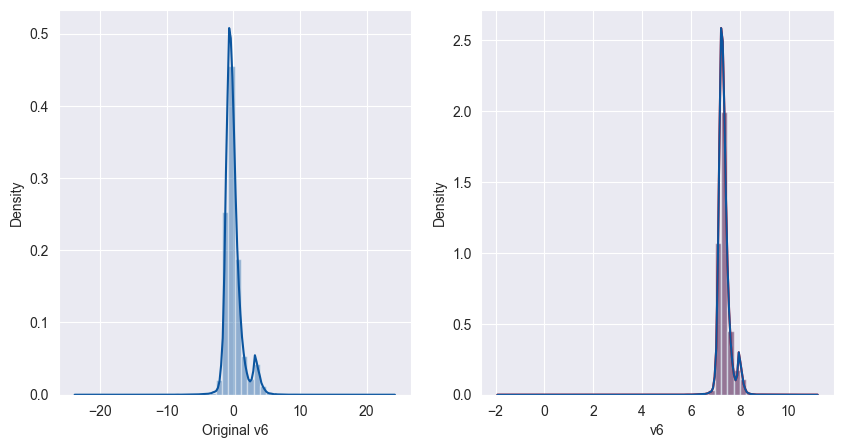

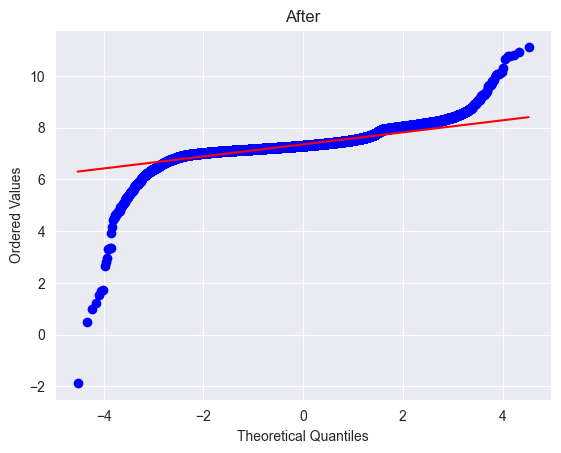


 ------------------------------------------------------

 'v7' had 'negative' skewness of -0.66

 Transformation yielded skewness of 1.37


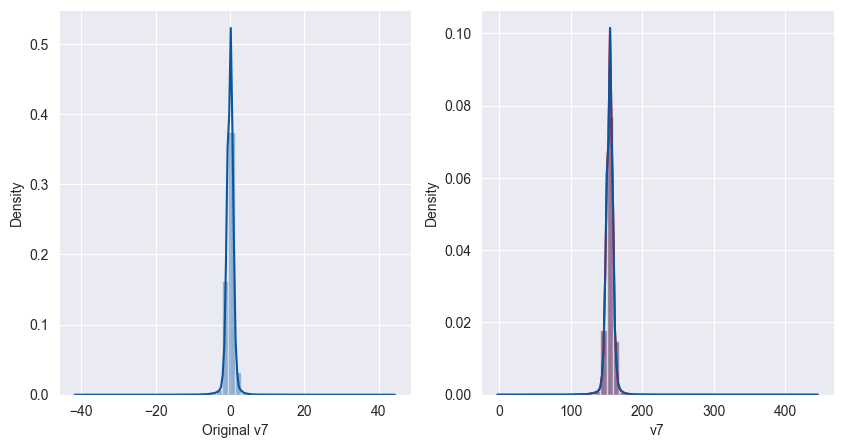

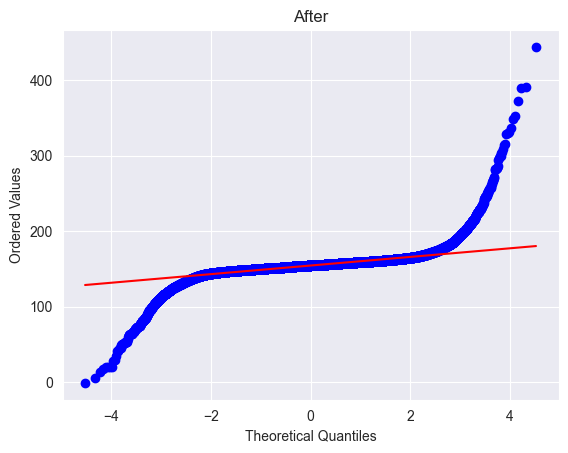


 ------------------------------------------------------

 'v8' had 'negative' skewness of -8.90

 Transformation yielded skewness of 2.50


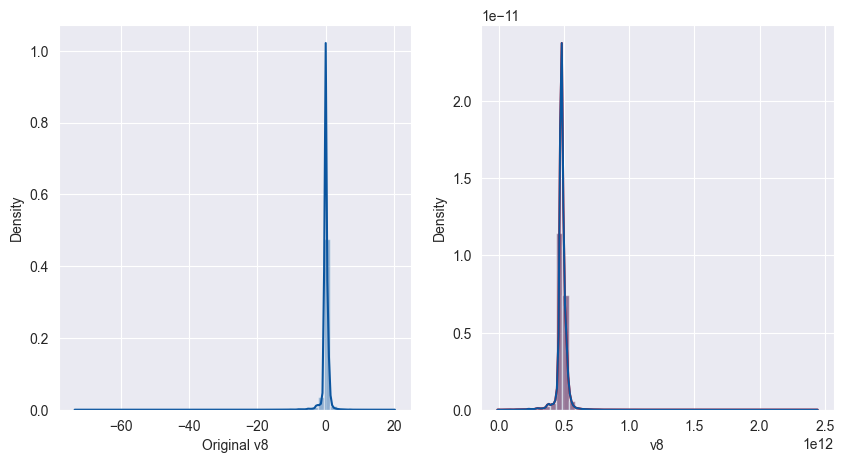

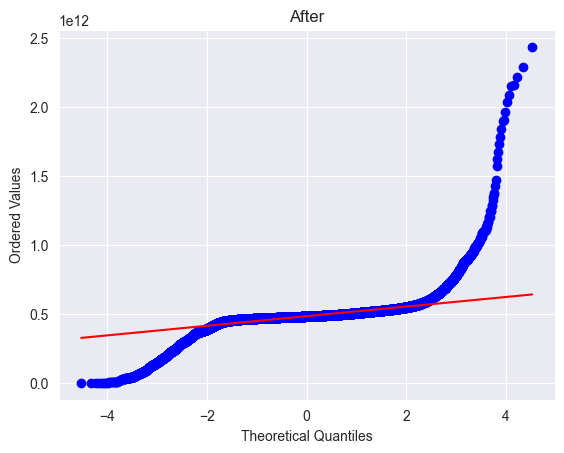


 ------------------------------------------------------

 'v9' had 'positive' skewness of 0.56

 Transformation yielded skewness of 0.11


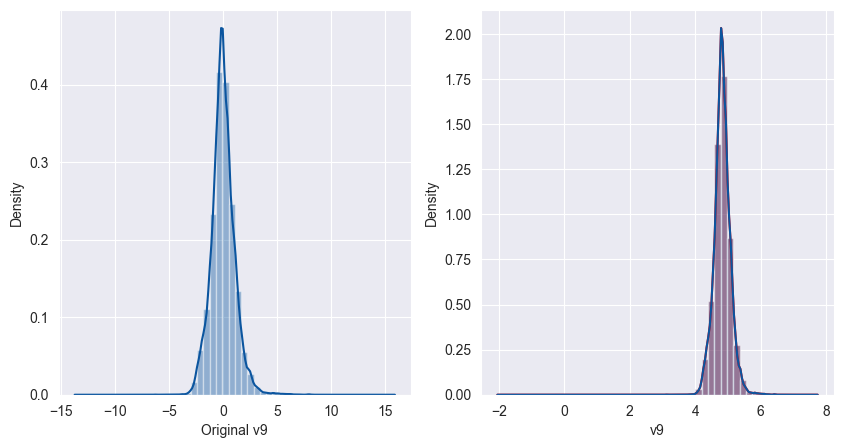

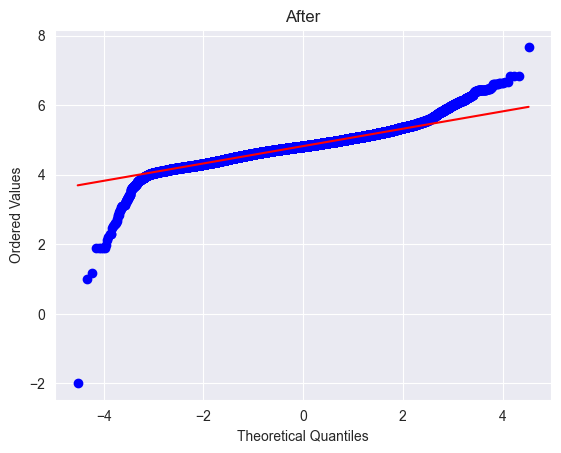


 ------------------------------------------------------

 'v10' had 'positive' skewness of 1.18

 Transformation yielded skewness of 0.66


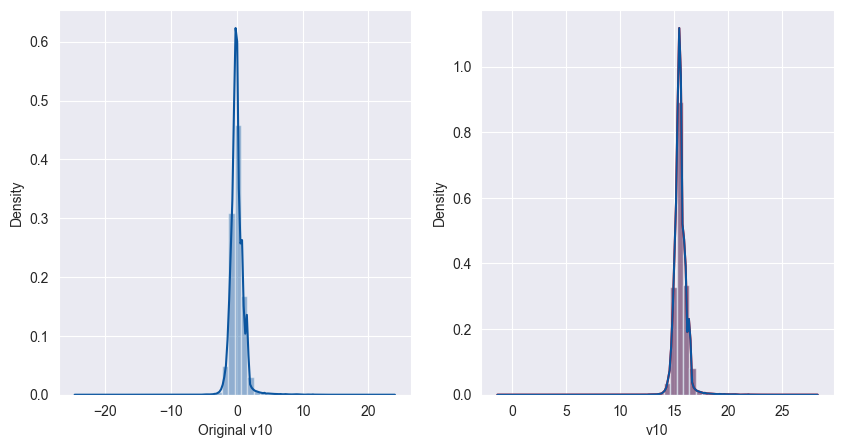

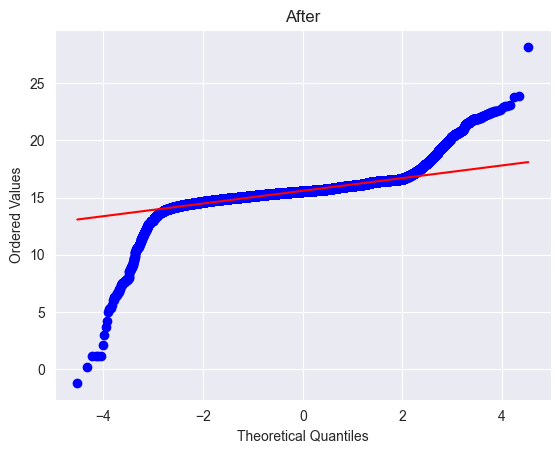


 ------------------------------------------------------

 'v12' had 'negative' skewness of -2.25

 Transformation yielded skewness of 0.14


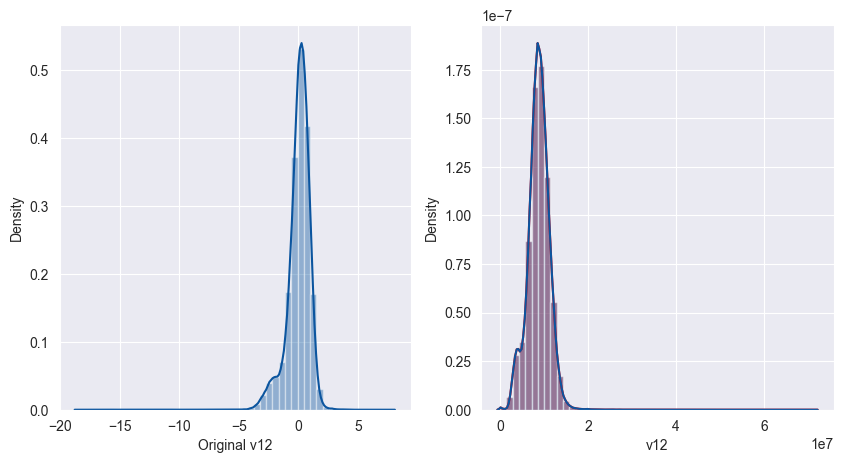

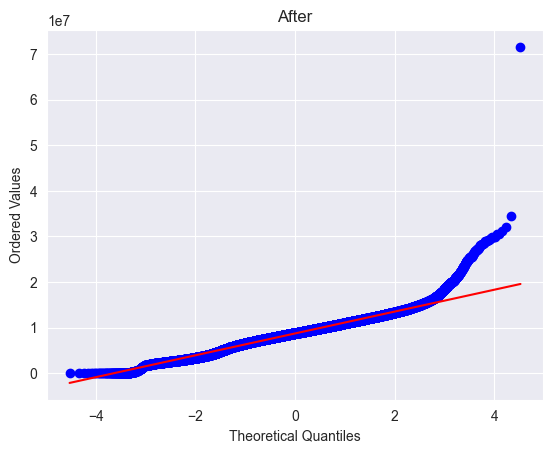


 ------------------------------------------------------

 'v14' had 'negative' skewness of -1.99

 Transformation yielded skewness of 0.35


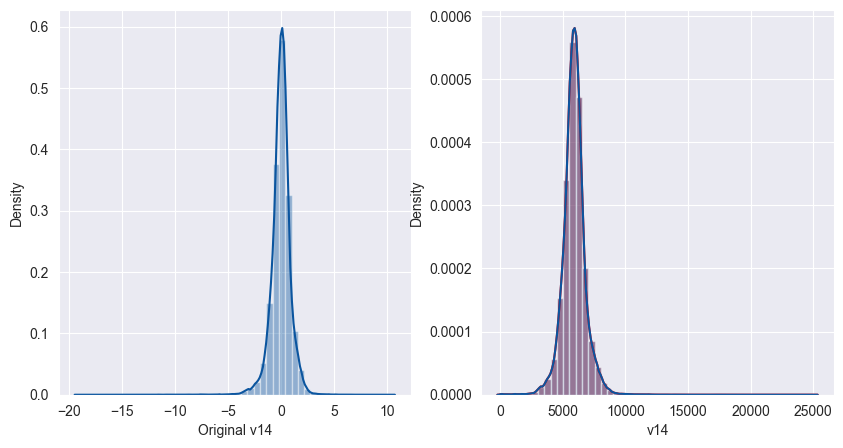

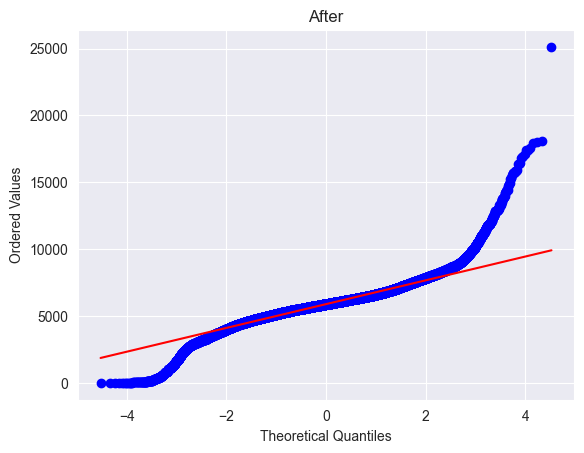


 ------------------------------------------------------

 'v16' had 'negative' skewness of -1.10

 Transformation yielded skewness of 0.13


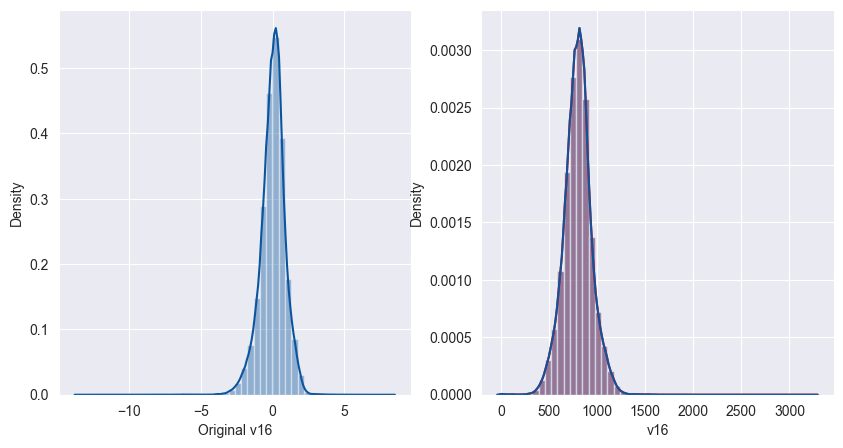

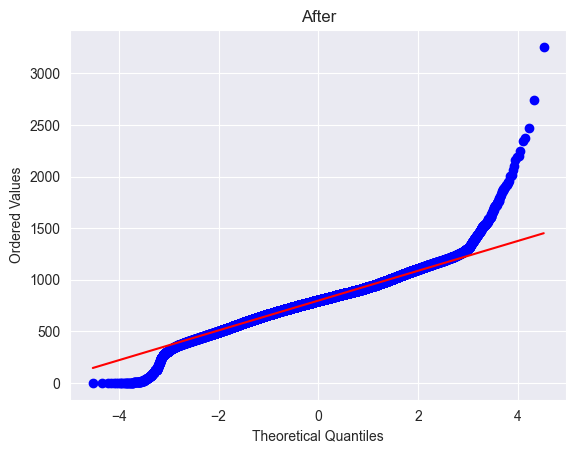


 ------------------------------------------------------

 'v17' had 'negative' skewness of -3.75

 Transformation yielded skewness of 0.64


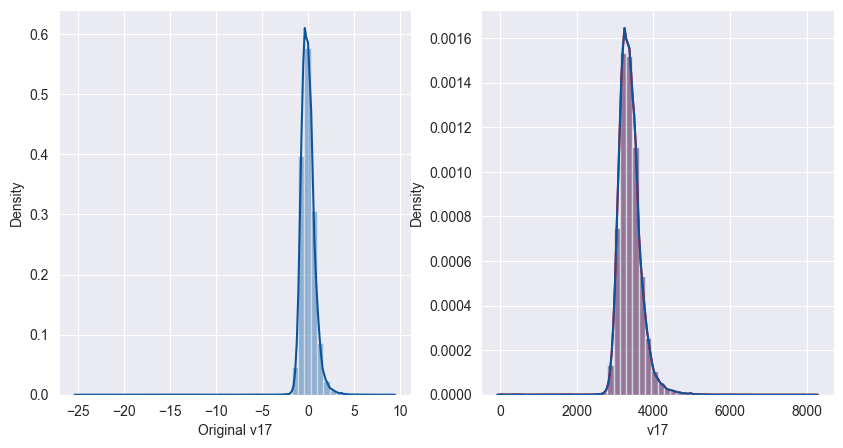

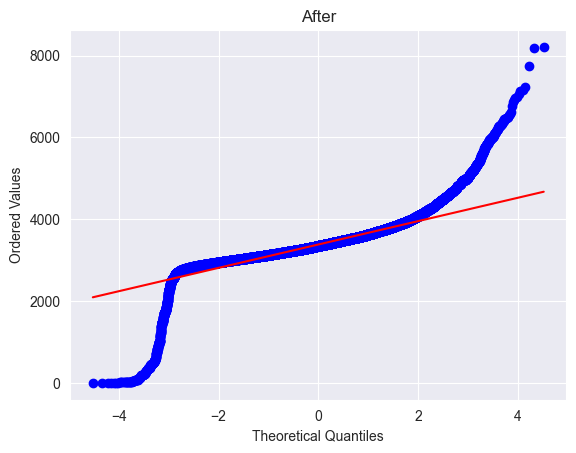


 ------------------------------------------------------

 'v20' had 'negative' skewness of -1.91

 Transformation yielded skewness of 2.35


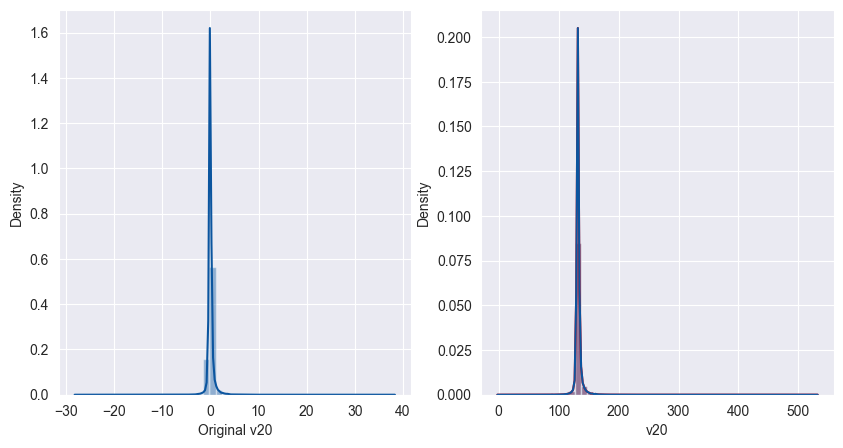

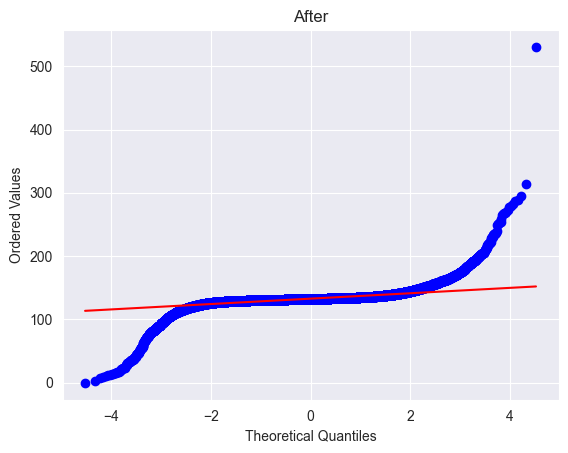


 ------------------------------------------------------

 'v21' had 'positive' skewness of 3.89

 Transformation yielded skewness of 2.00


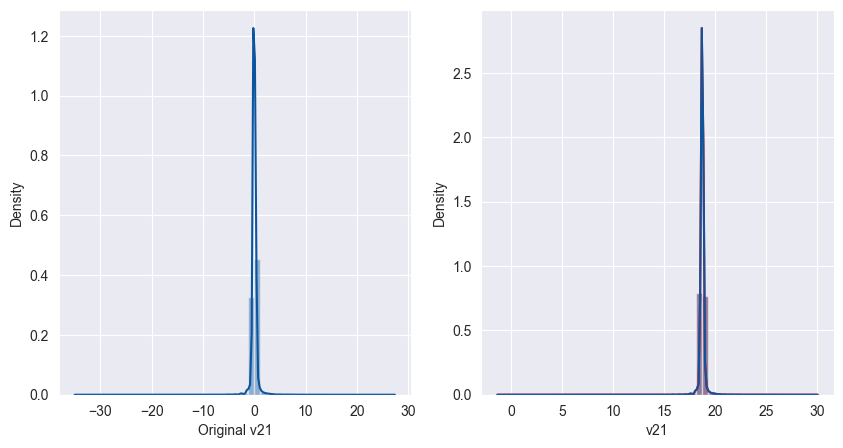

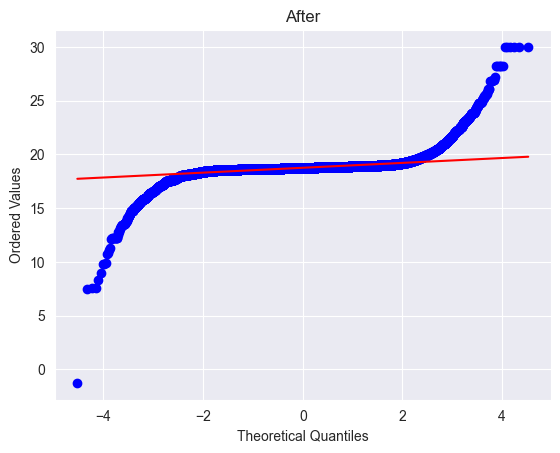


 ------------------------------------------------------

 'v23' had 'negative' skewness of -6.96

 Transformation yielded skewness of 2.89


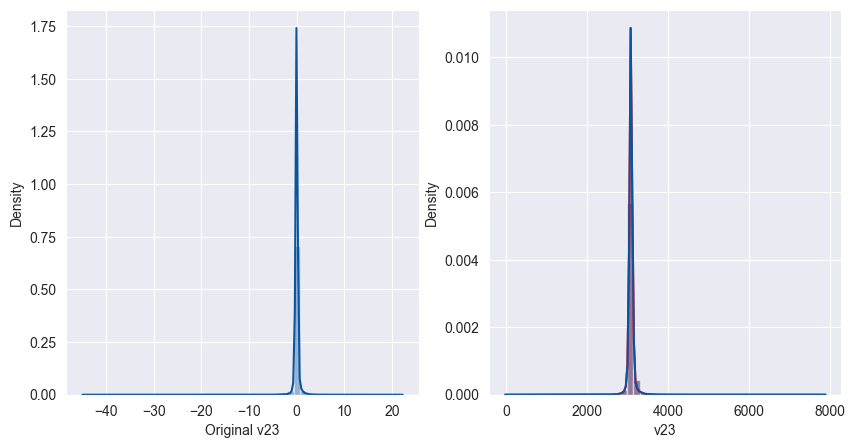

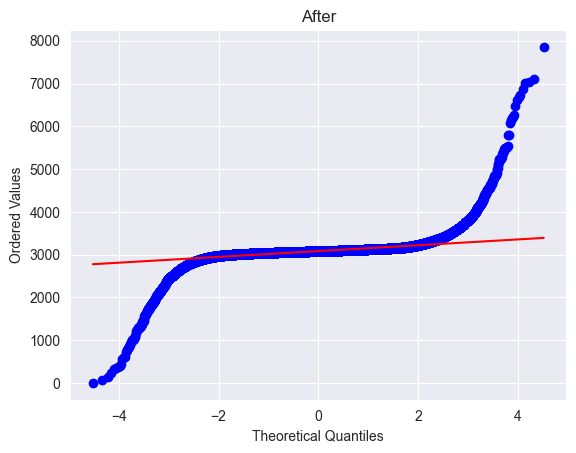


 ------------------------------------------------------

 'v24' had 'negative' skewness of -0.55

 Transformation yielded skewness of 0.03


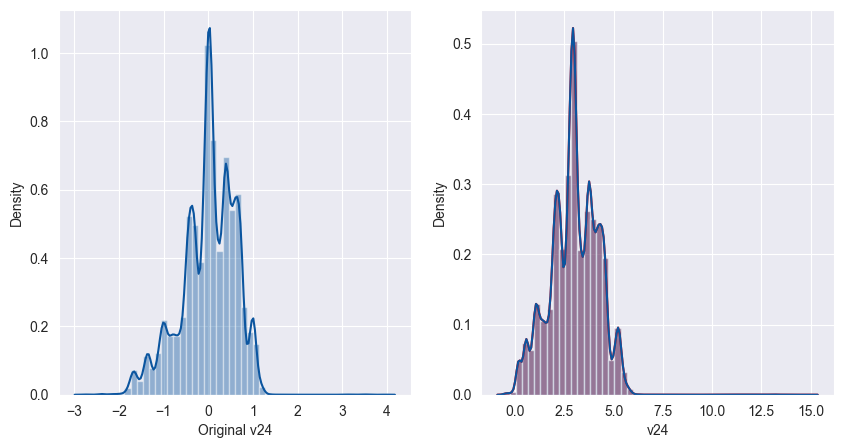

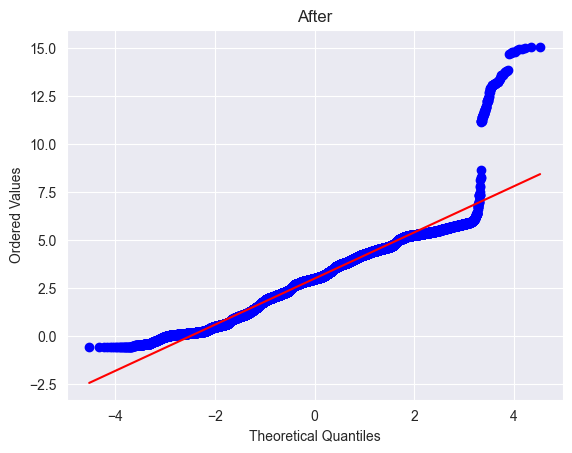


 ------------------------------------------------------

 'v26' had 'positive' skewness of 0.58

 Transformation yielded skewness of 0.01


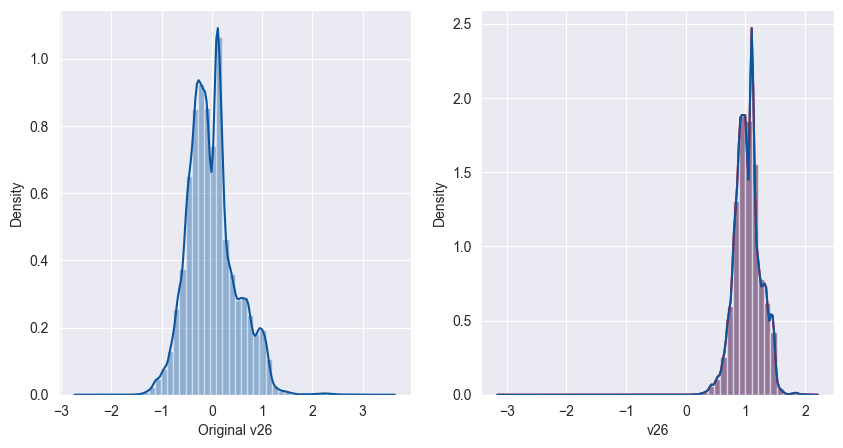

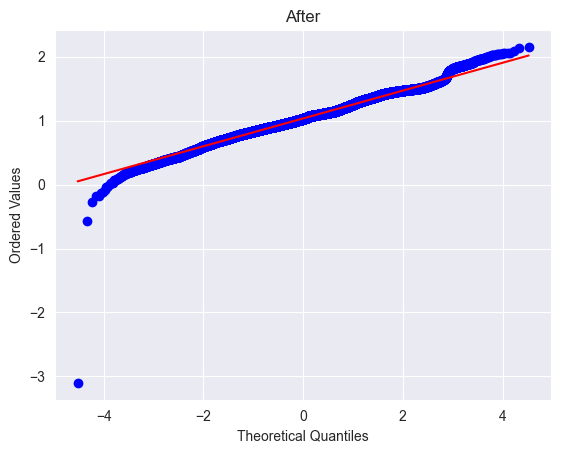


 ------------------------------------------------------

 'v27' had 'negative' skewness of -3.10

 Transformation yielded skewness of 1.51


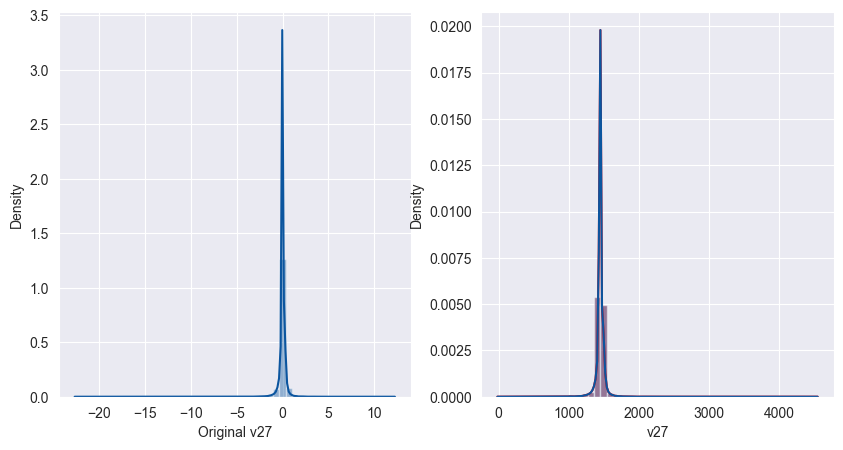

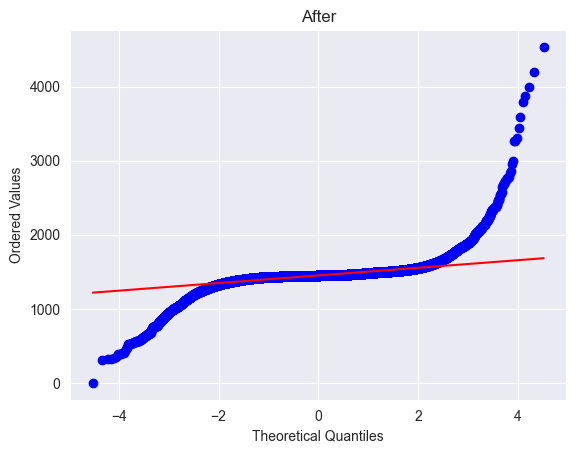


 ------------------------------------------------------

 'v28' had 'positive' skewness of 9.13

 Transformation yielded skewness of 2.91


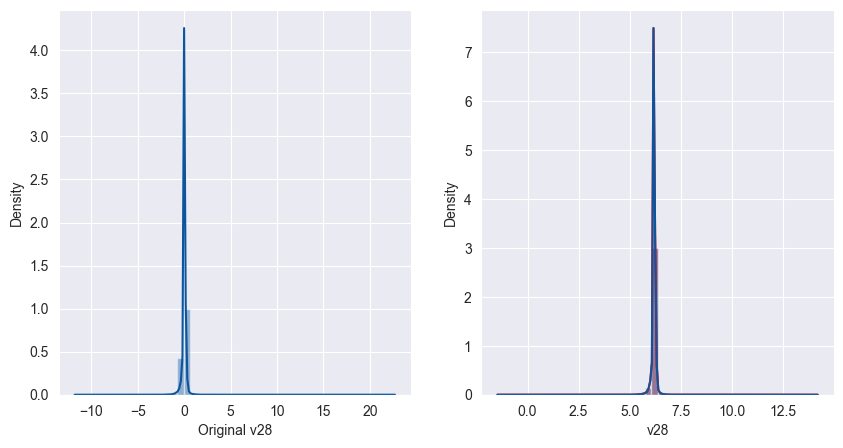

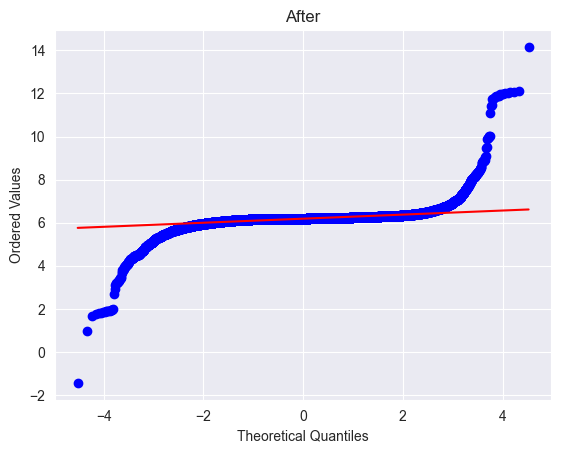


 ------------------------------------------------------

 'amount' had 'positive' skewness of 12.11

 Transformation yielded skewness of 0.00


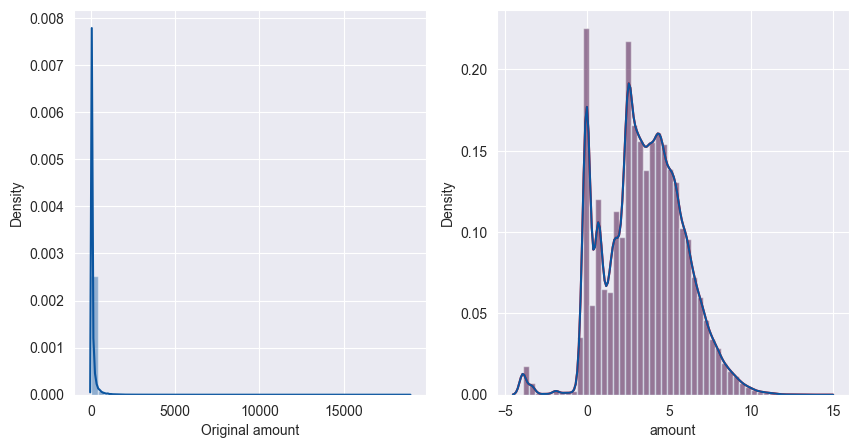

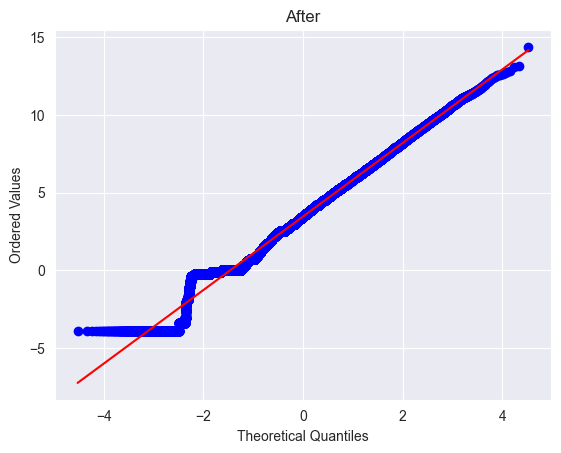

In [19]:
train_skewness = df_train[num_featuers].select_dtypes(include=['number']).apply(lambda x: x.skew())
    
    # Filter features with skewness greater than threshold or less than -threshold
train_skewed_features = train_skewness[(train_skewness > 0.5) | (train_skewness < -0.5)]

train_skewed_feats= list(train_skewed_features.keys())

df_train[train_skewed_feats]=skew_autotransform(df_train[train_skewed_feats].copy(deep=True), plot = True, exp = False, threshold = 0.5).values


 ------------------------------------------------------

 'v1' had 'negative' skewness of -3.56

 Transformation yielded skewness of -0.13


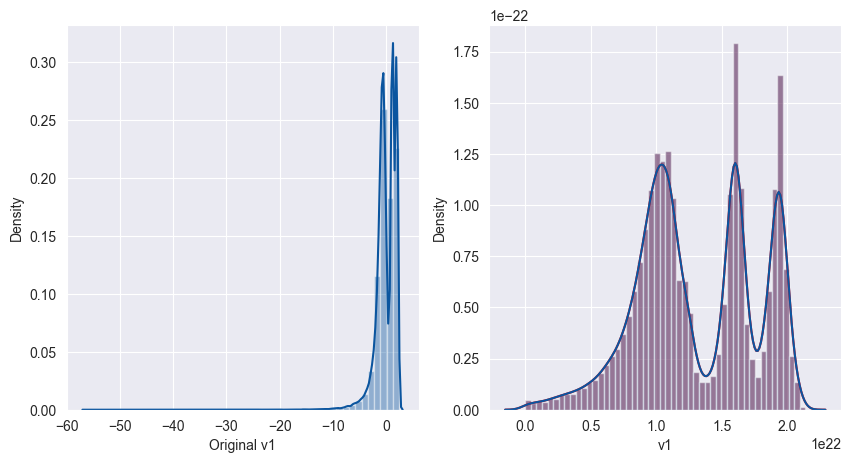

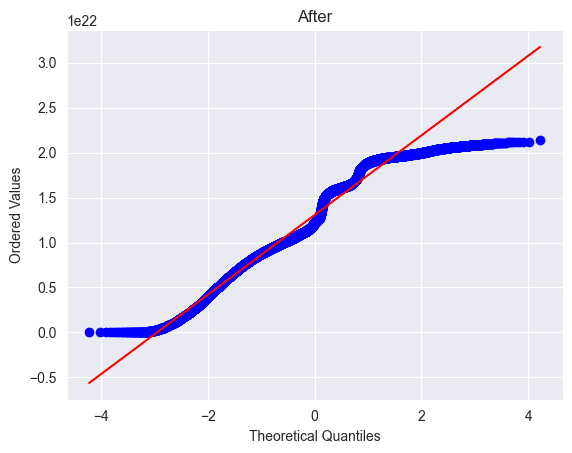


 ------------------------------------------------------

 'v2' had 'negative' skewness of -6.39

 Transformation yielded skewness of 0.97


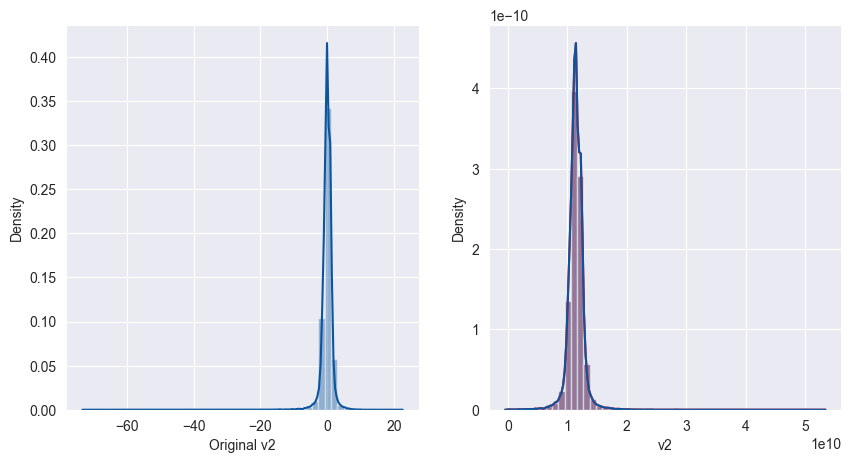

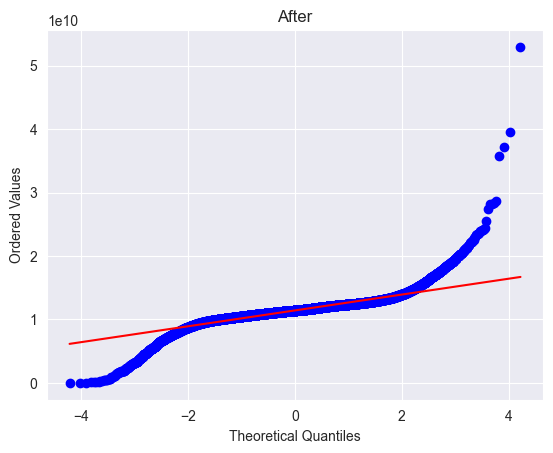


 ------------------------------------------------------

 'v3' had 'negative' skewness of -2.63

 Transformation yielded skewness of 0.01


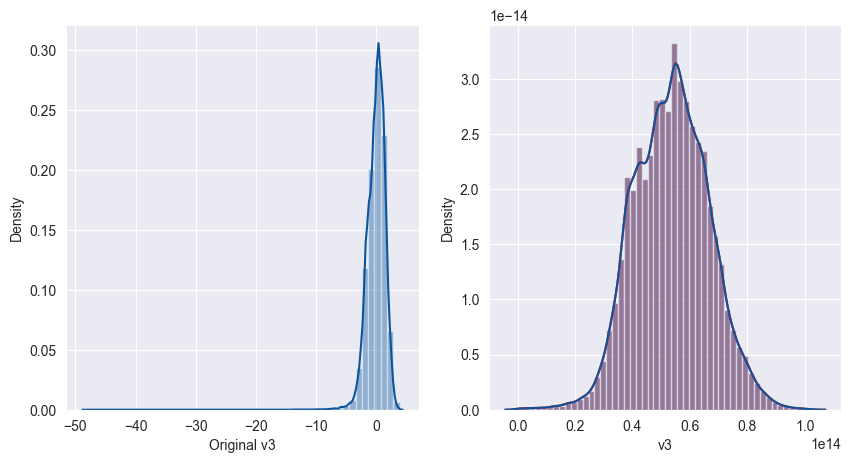

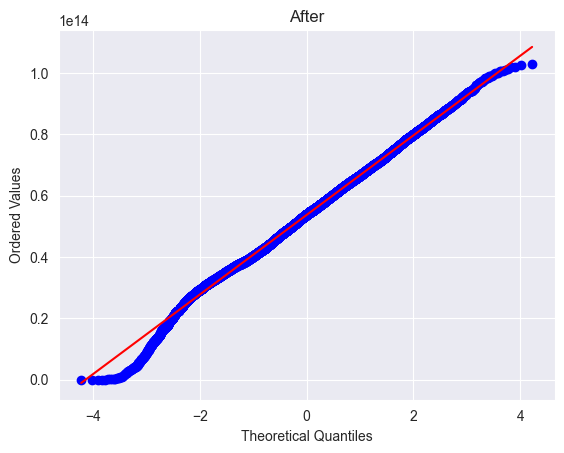


 ------------------------------------------------------

 'v4' had 'positive' skewness of 0.75

 Transformation yielded skewness of 0.10


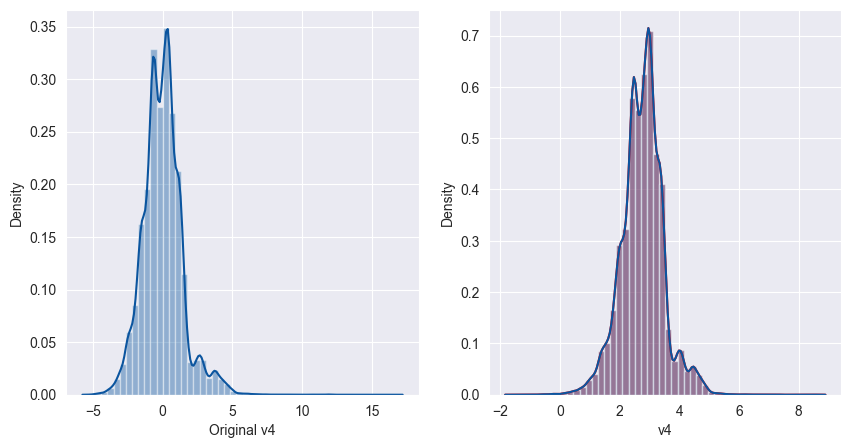

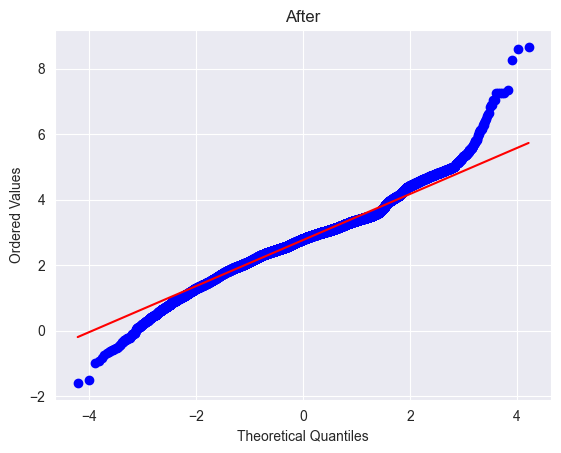


 ------------------------------------------------------

 'v5' had 'negative' skewness of -8.51

 Transformation yielded skewness of 0.94


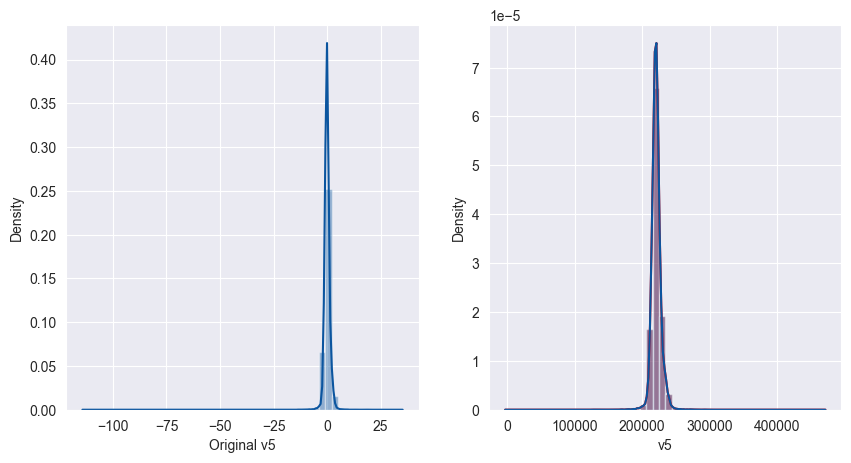

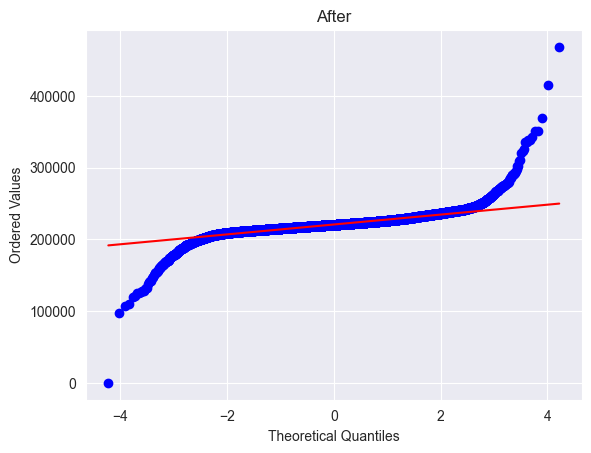


 ------------------------------------------------------

 'v6' had 'positive' skewness of 3.76

 Transformation yielded skewness of 1.03


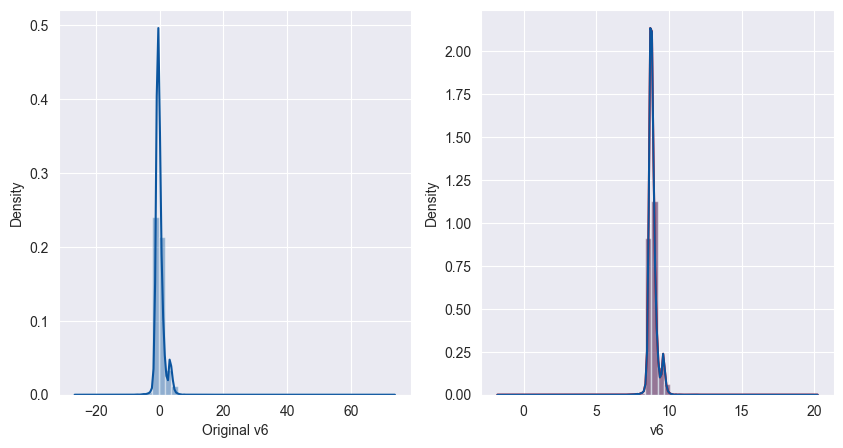

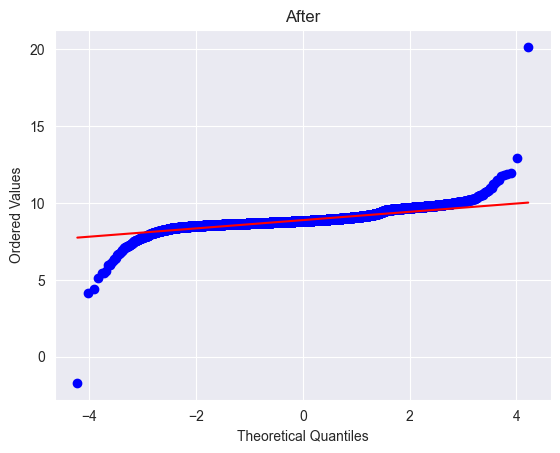


 ------------------------------------------------------

 'v7' had 'positive' skewness of 12.80

 Transformation yielded skewness of 4.31


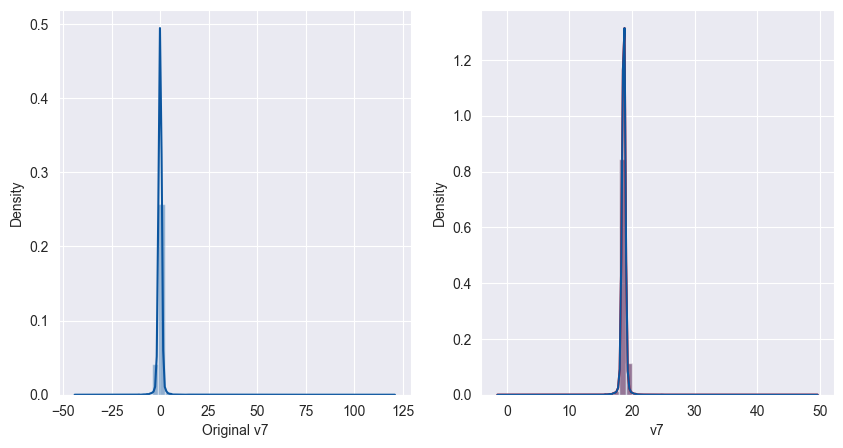

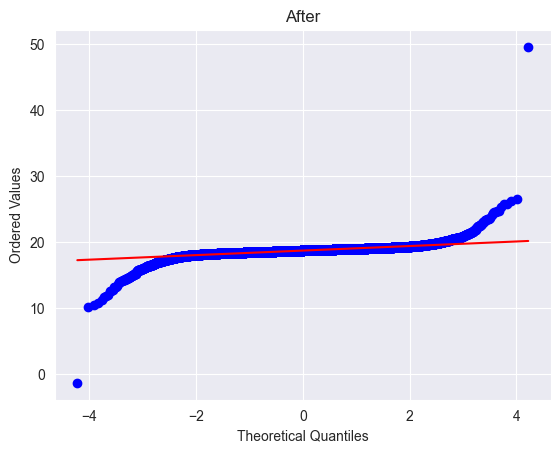


 ------------------------------------------------------

 'v8' had 'negative' skewness of -6.93

 Transformation yielded skewness of 2.75


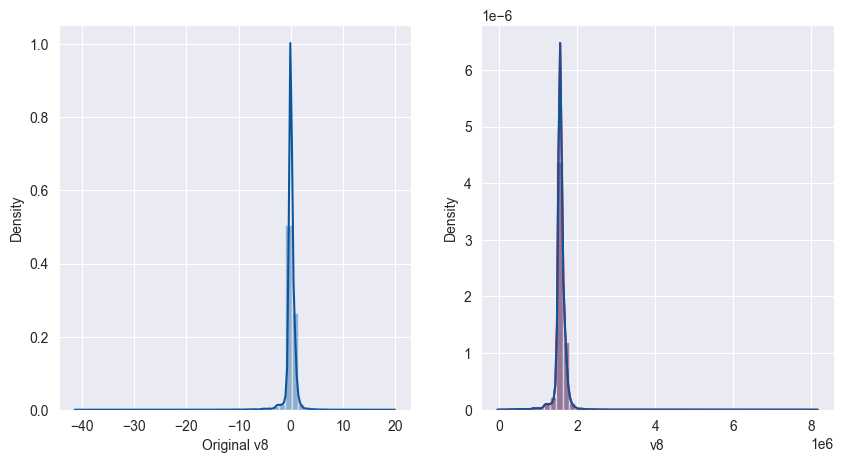

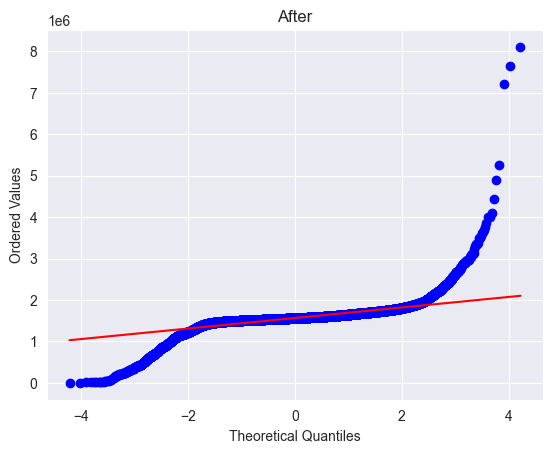


 ------------------------------------------------------

 'v9' had 'positive' skewness of 0.53

 Transformation yielded skewness of 0.17


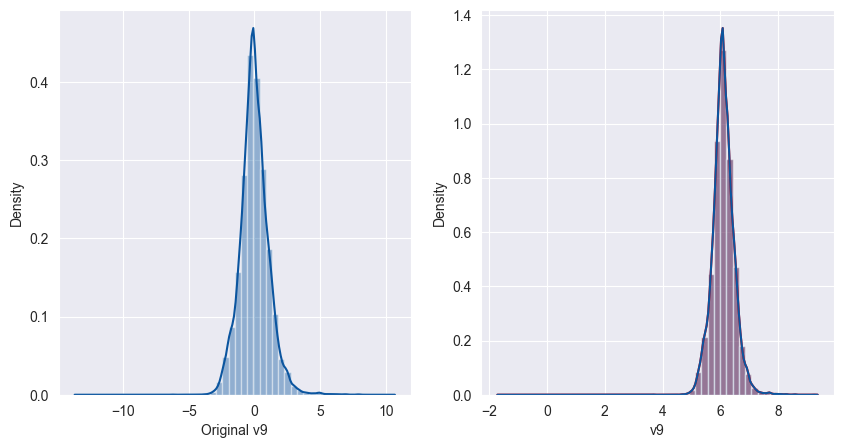

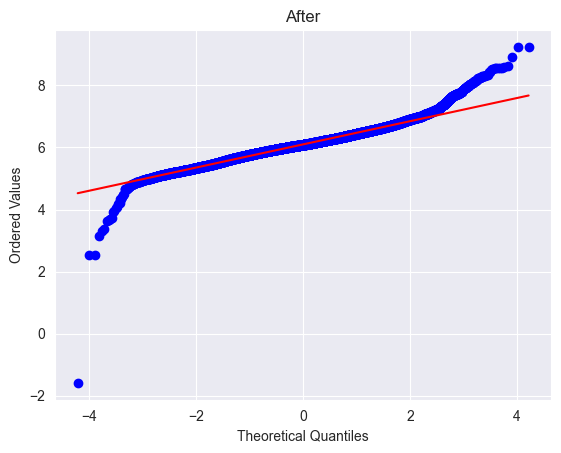


 ------------------------------------------------------

 'v10' had 'positive' skewness of 1.23

 Transformation yielded skewness of 0.70


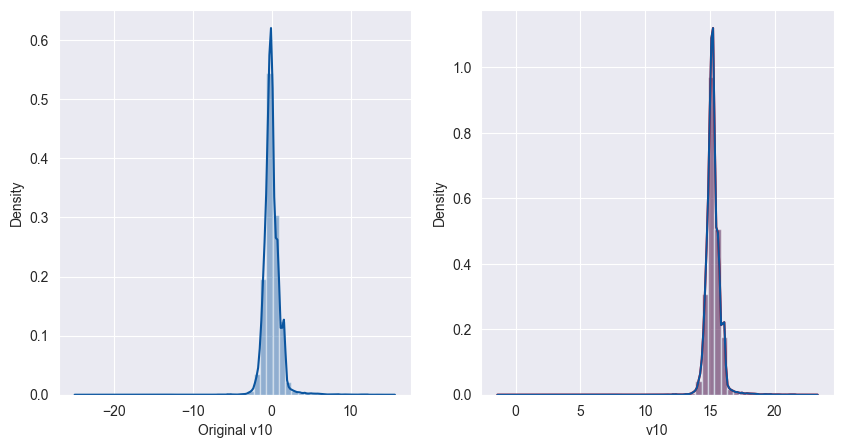

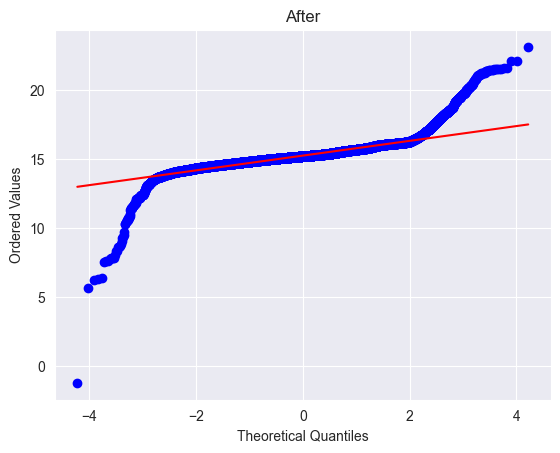


 ------------------------------------------------------

 'v12' had 'negative' skewness of -2.38

 Transformation yielded skewness of 0.07


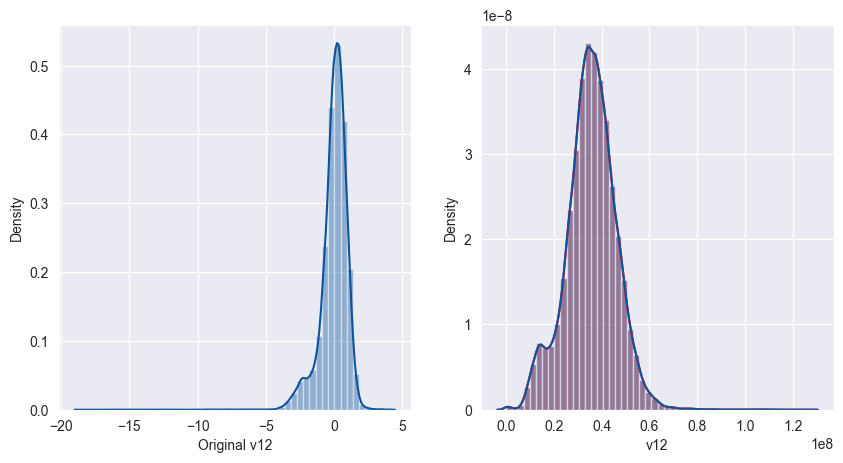

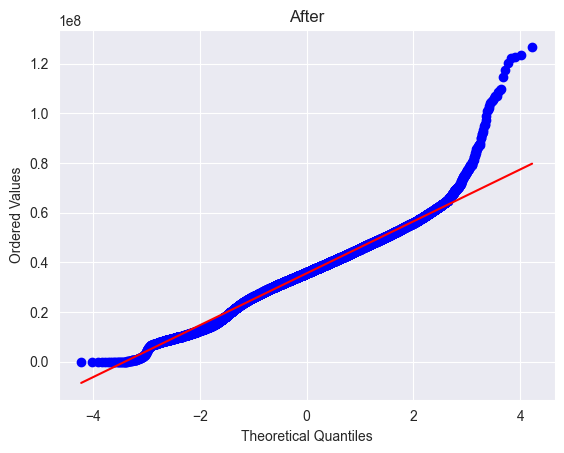


 ------------------------------------------------------

 'v14' had 'negative' skewness of -2.00

 Transformation yielded skewness of 0.32


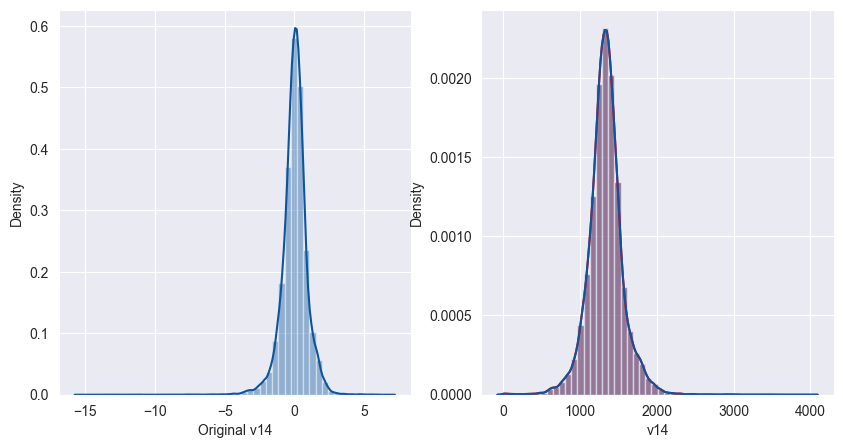

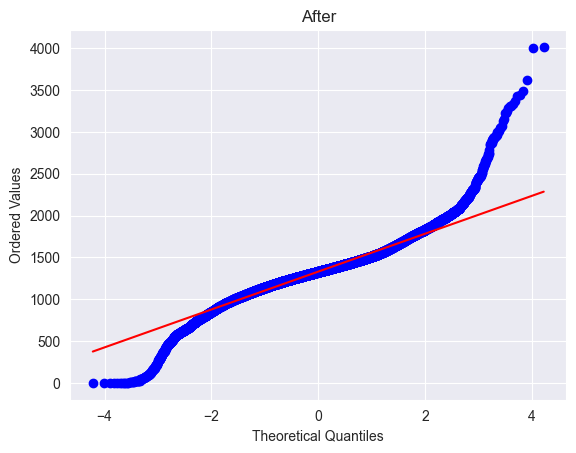


 ------------------------------------------------------

 'v16' had 'negative' skewness of -1.11

 Transformation yielded skewness of 0.64


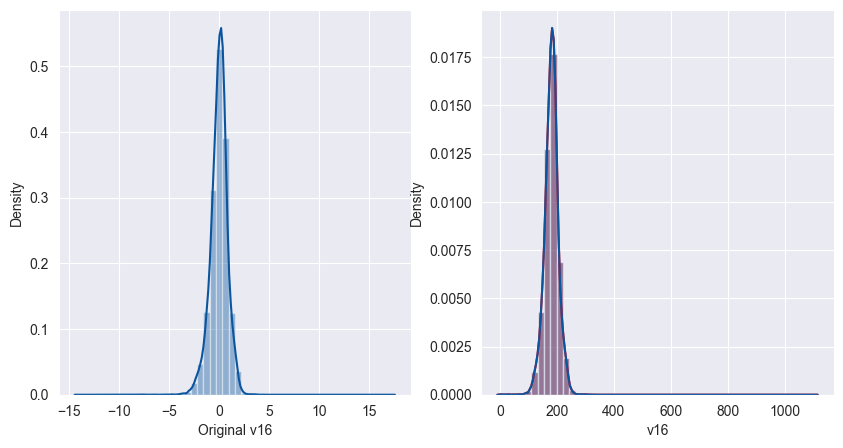

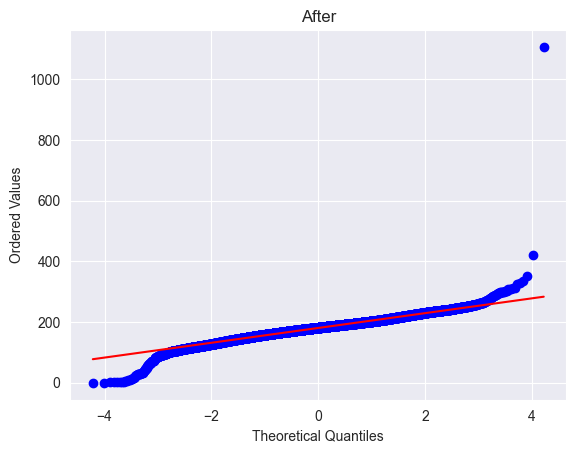


 ------------------------------------------------------

 'v17' had 'negative' skewness of -4.20

 Transformation yielded skewness of 0.65


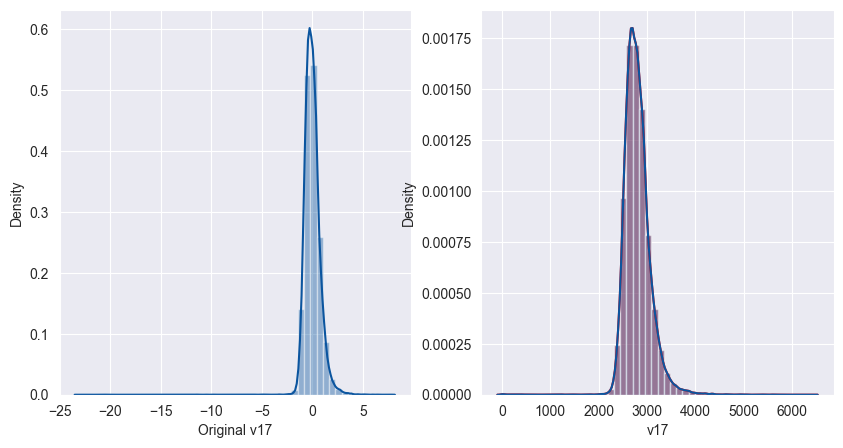

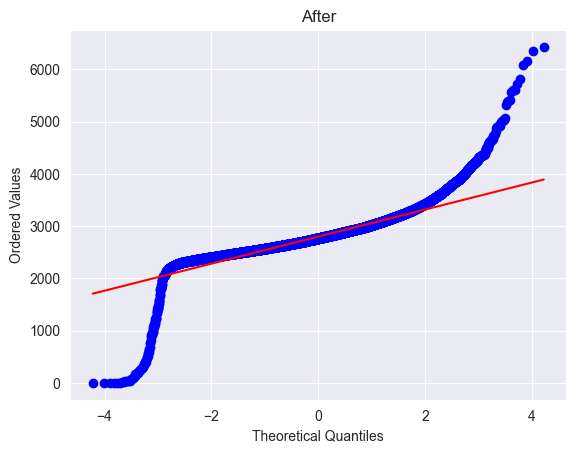


 ------------------------------------------------------

 'v20' had 'negative' skewness of -2.42

 Transformation yielded skewness of 3.45


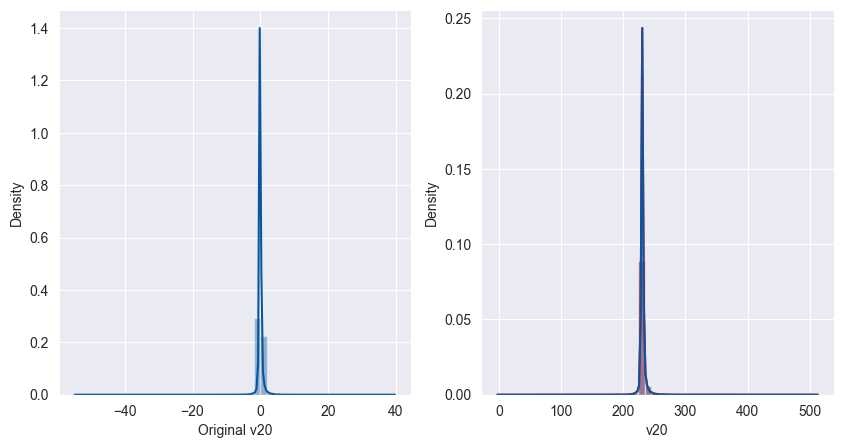

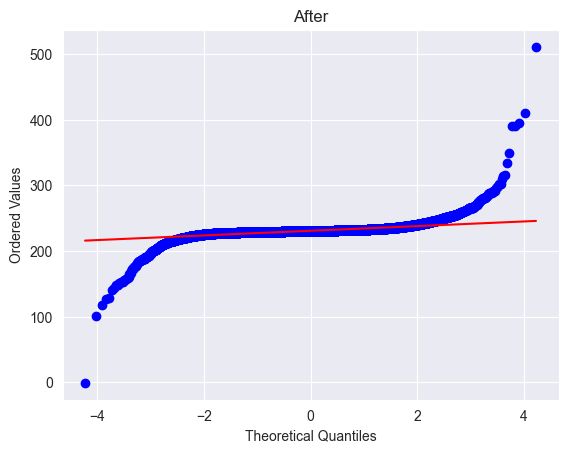


 ------------------------------------------------------

 'v21' had 'positive' skewness of 2.31

 Transformation yielded skewness of 2.06


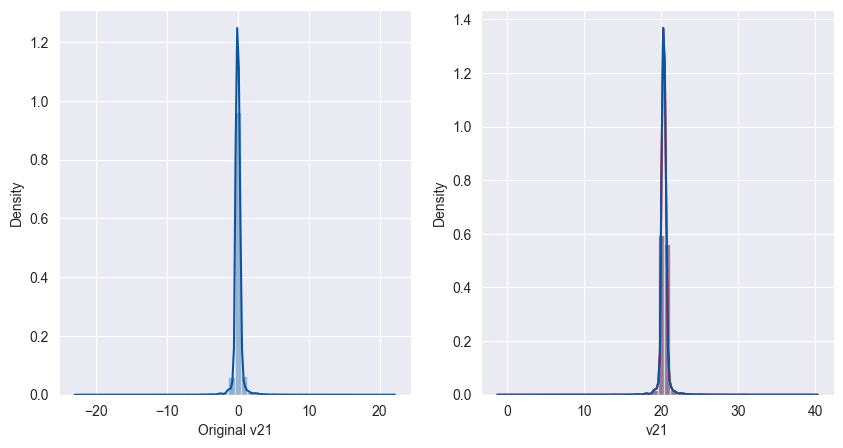

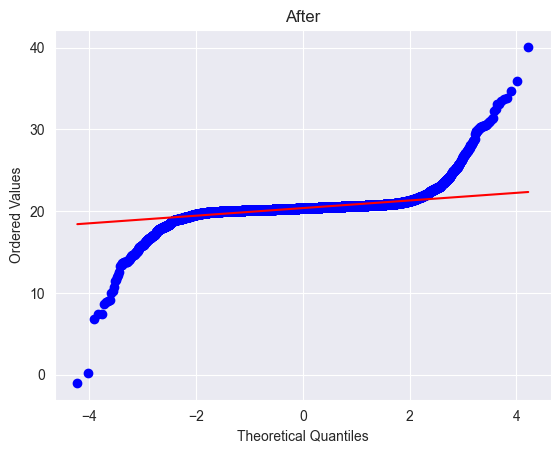


 ------------------------------------------------------

 'v23' had 'negative' skewness of -1.28

 Transformation yielded skewness of 3.31


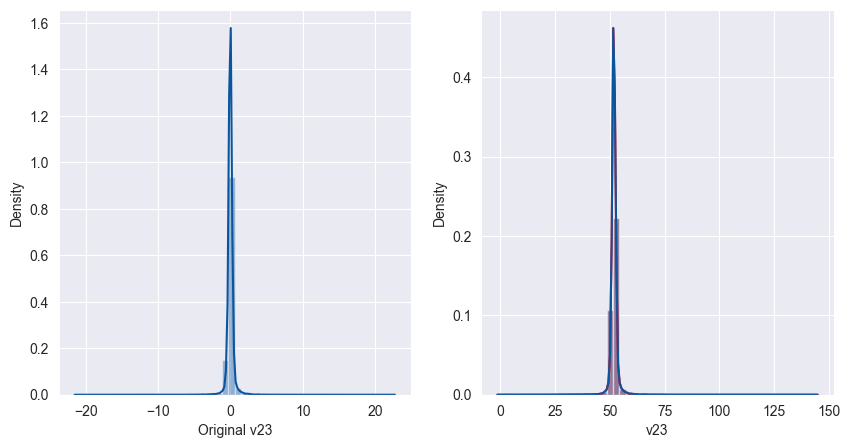

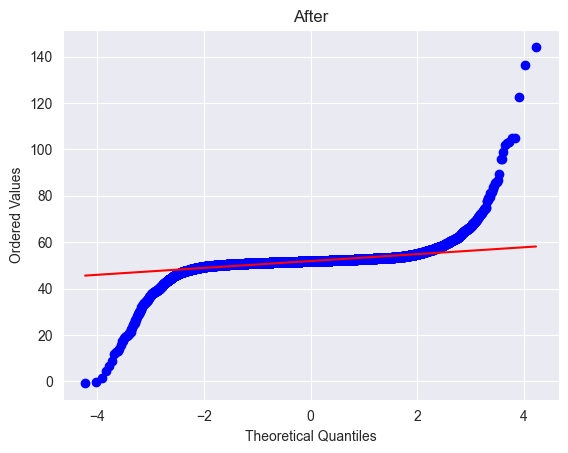


 ------------------------------------------------------

 'v24' had 'negative' skewness of -0.56

 Transformation yielded skewness of 0.01


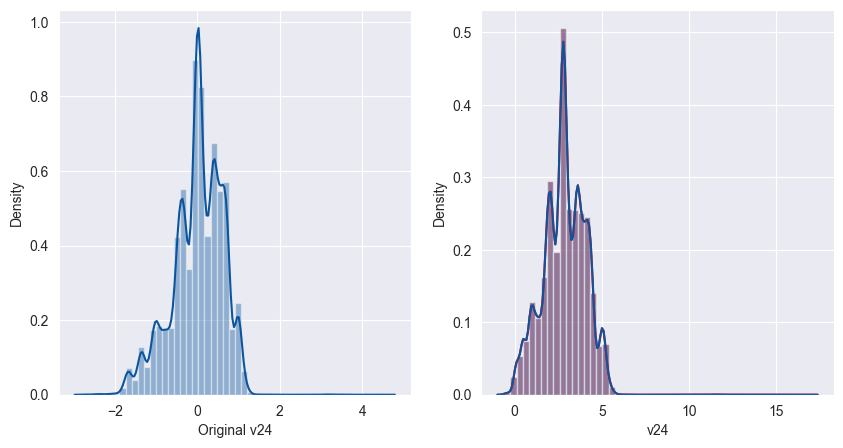

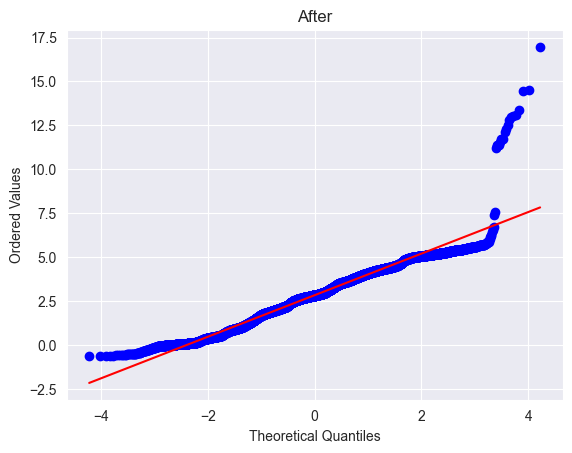


 ------------------------------------------------------

 'v26' had 'positive' skewness of 0.57

 Transformation yielded skewness of 0.03


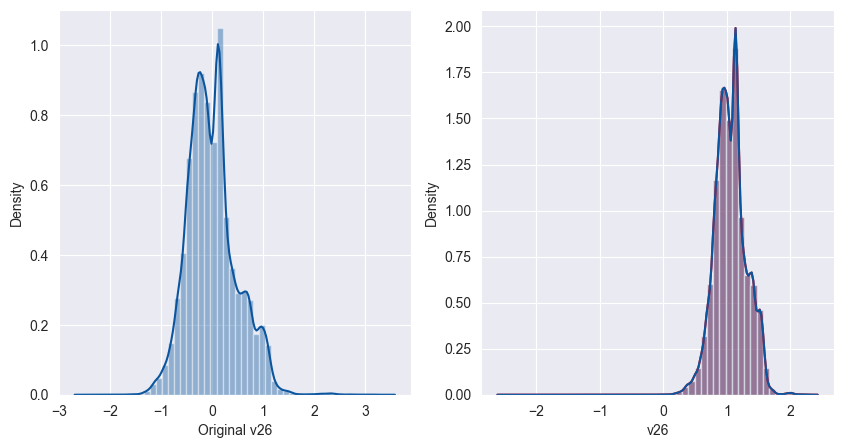

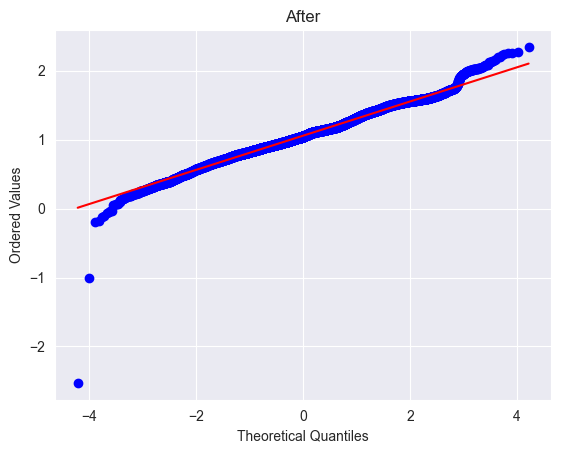


 ------------------------------------------------------

 'v27' had 'positive' skewness of 5.36

 Transformation yielded skewness of 4.12


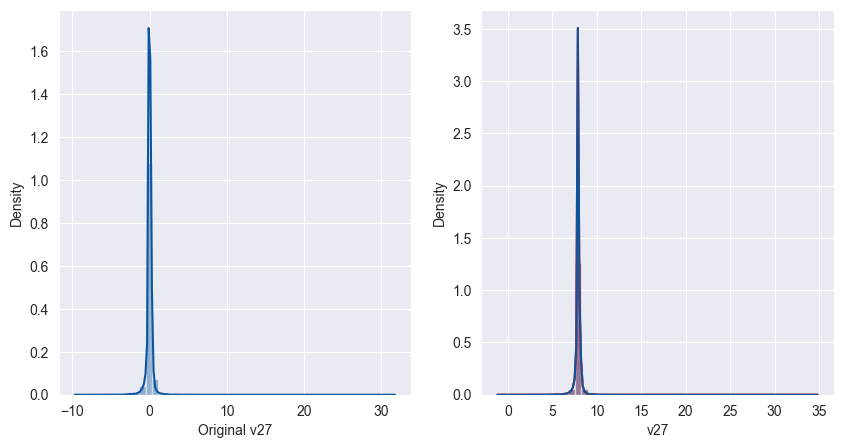

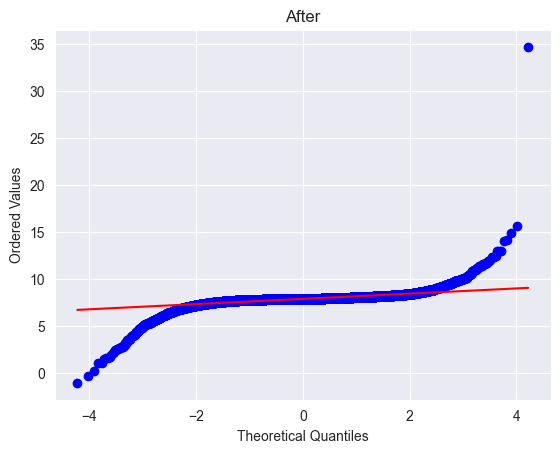


 ------------------------------------------------------

 'v28' had 'positive' skewness of 17.52

 Transformation yielded skewness of 7.32


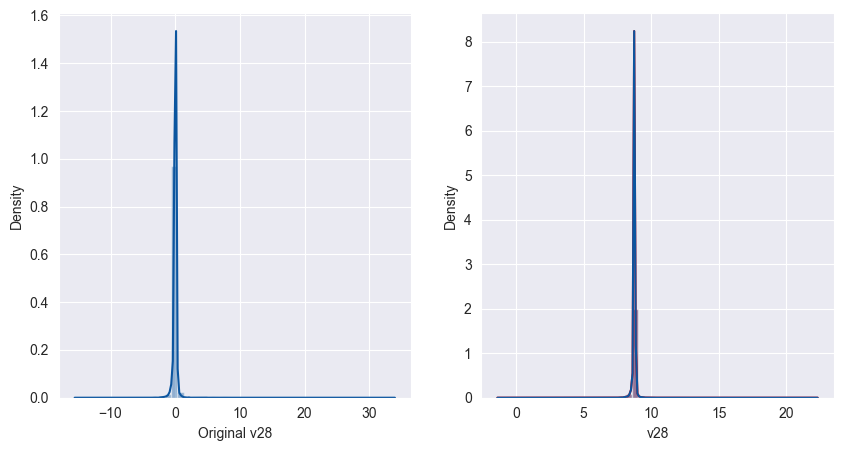

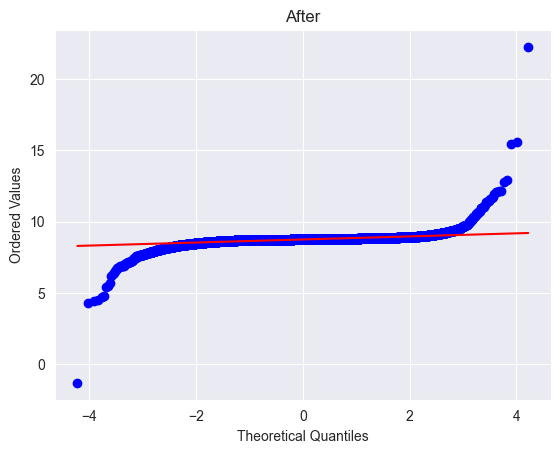


 ------------------------------------------------------

 'amount' had 'positive' skewness of 27.13

 Transformation yielded skewness of 0.00


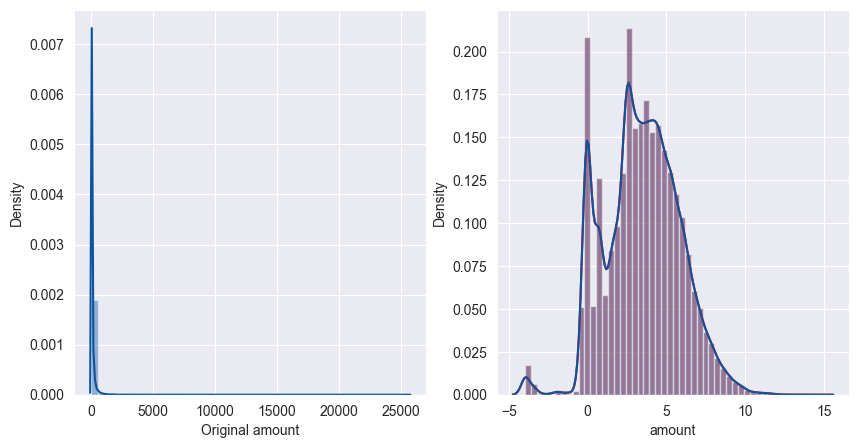

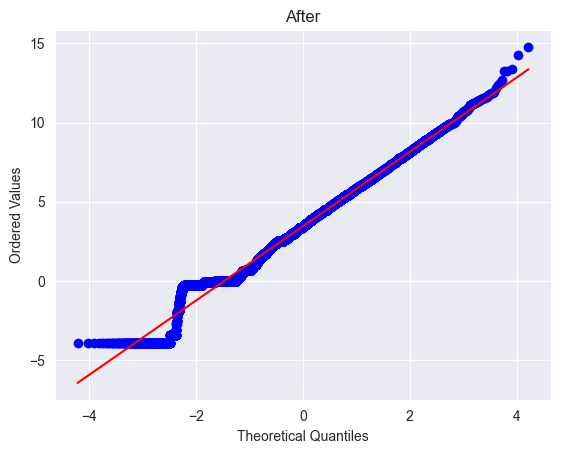

In [20]:
test_skewness = df_test[num_featuers].select_dtypes(include=['number']).apply(lambda x: x.skew())
    
    # Filter features with skewness greater than threshold or less than -threshold
test_skewed_features = test_skewness[(test_skewness > 0.5) | (test_skewness < -0.5)]

test_skewed_feats= list(test_skewed_features.keys())

df_test[test_skewed_feats]=skew_autotransform(df_test[test_skewed_feats].copy(deep=True), plot = True, exp = False, threshold = 0.5).values

In [21]:
print(df_train.corr()[target].sort_values(ascending=False))
print('-------------- \n')
print(df_test.corr()[target].sort_values(ascending=False))

class     1.000000
v11       0.152038
v2        0.131767
v4        0.112148
v8        0.083914
v21       0.041478
v19       0.032091
v27       0.023867
v20       0.021062
v28       0.009925
v25       0.004291
v26       0.003489
v23      -0.000739
v22      -0.001269
v15      -0.003902
v13      -0.005438
v24      -0.008953
amount   -0.011418
time     -0.012185
v6       -0.045983
v1       -0.054199
v5       -0.088136
v3       -0.097334
v18      -0.108364
v12      -0.109747
v9       -0.111909
v16      -0.113878
v7       -0.173498
v14      -0.178342
v17      -0.197350
v10      -0.227853
Name: class, dtype: float64
-------------- 

class     1.000000
v11       0.165784
v2        0.133813
v4        0.122874
v8        0.077346
v19       0.045046
v21       0.025301
v27       0.021210
v20       0.021115
v26       0.009100
v22       0.008730
v28       0.007187
v25      -0.000424
v23      -0.000709
v13      -0.001267
v15      -0.005471
v24      -0.005989
amount   -0.010610
time     -0.012842
v6   

In [22]:
def multi_hist_plot(df1,df2,feature):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 12))

    sns.histplot(data = df1 , ax=axes[0], x = feature , hue = target,palette = sns.color_palette(["yellow" , "green",'red','blue','black','orange','purple']) ,multiple = "stack" ).set_title(f"{feature} Vs ")
    axes[0].set_title('Histogram of Train Data '+feature)

    sns.histplot(data = df2 , ax=axes[1], x = feature , hue = target,palette = sns.color_palette(["yellow" , "green",'red','blue','black','orange','purple']) ,multiple = "stack" ).set_title(f"{feature} Vs ")
    axes[1].set_title('Histogram of Test Data '+feature)
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    plt.show()

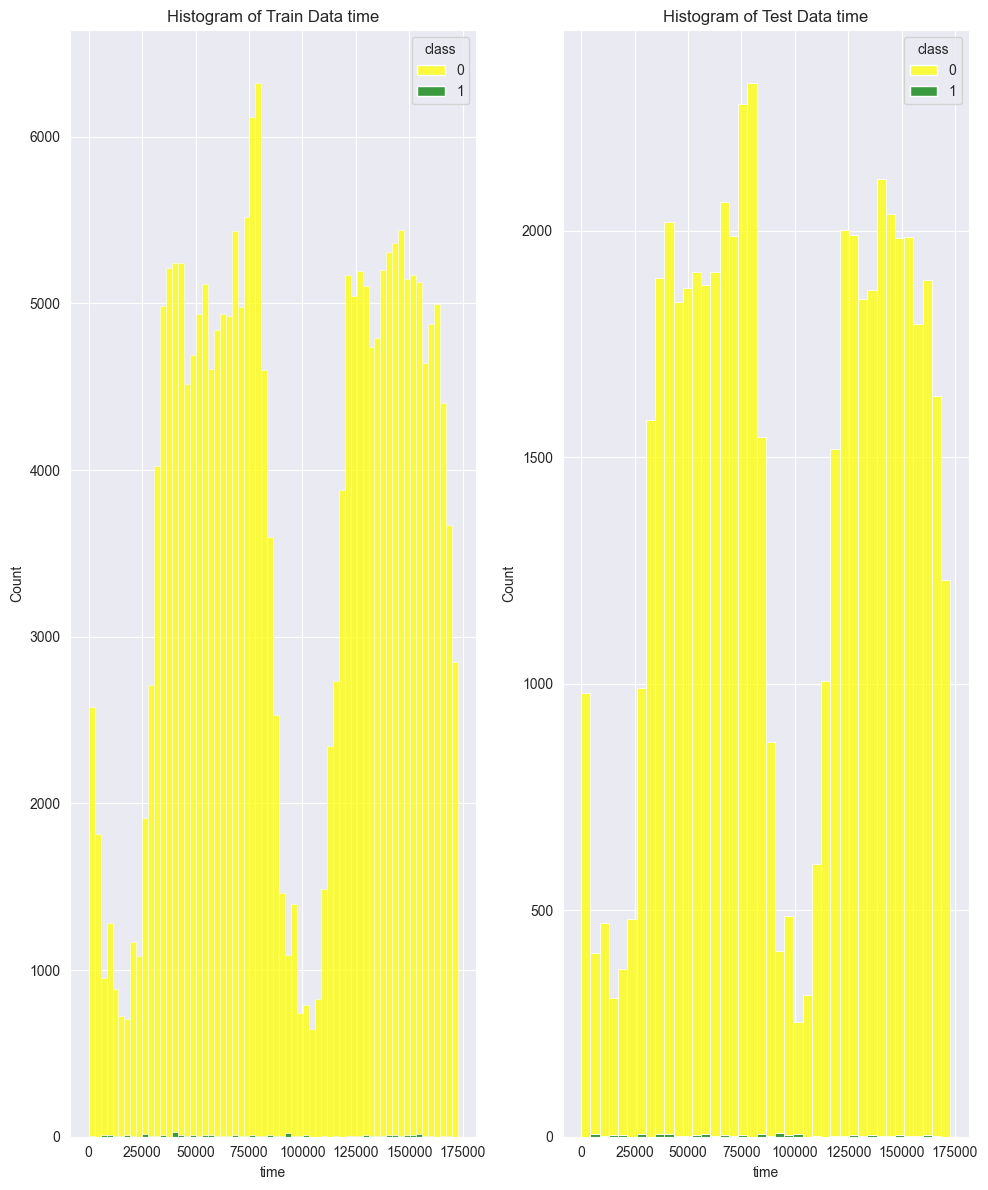

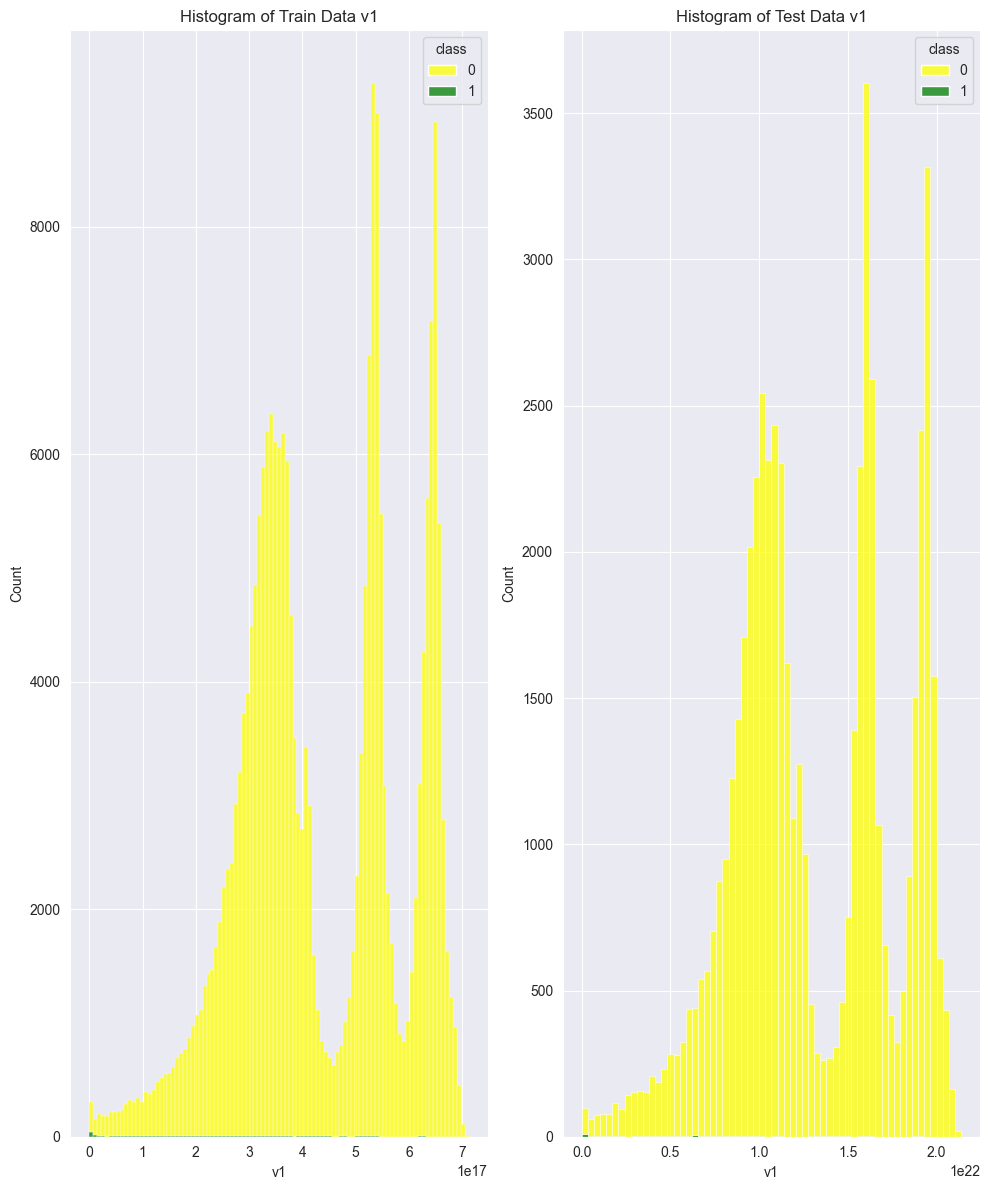

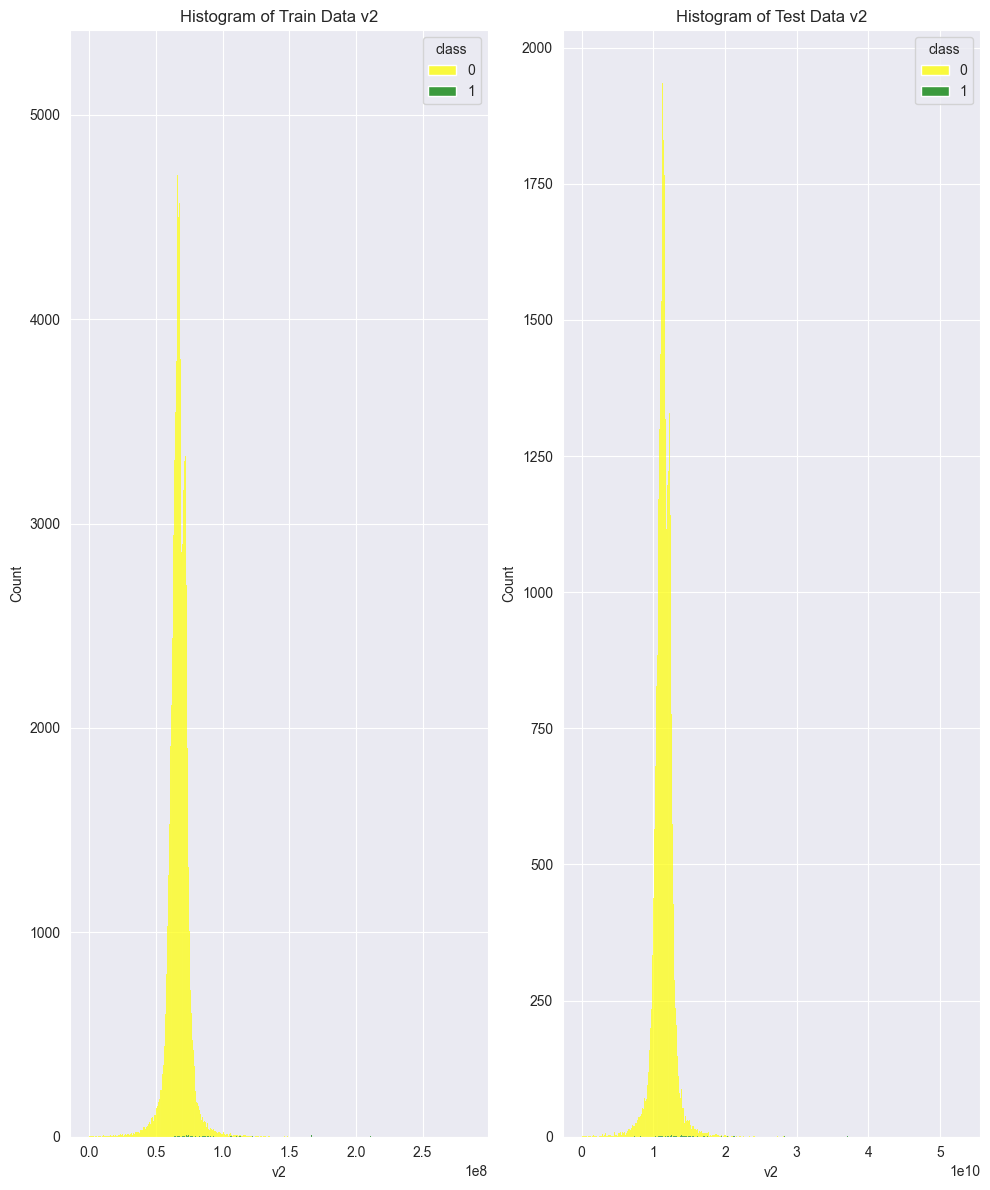

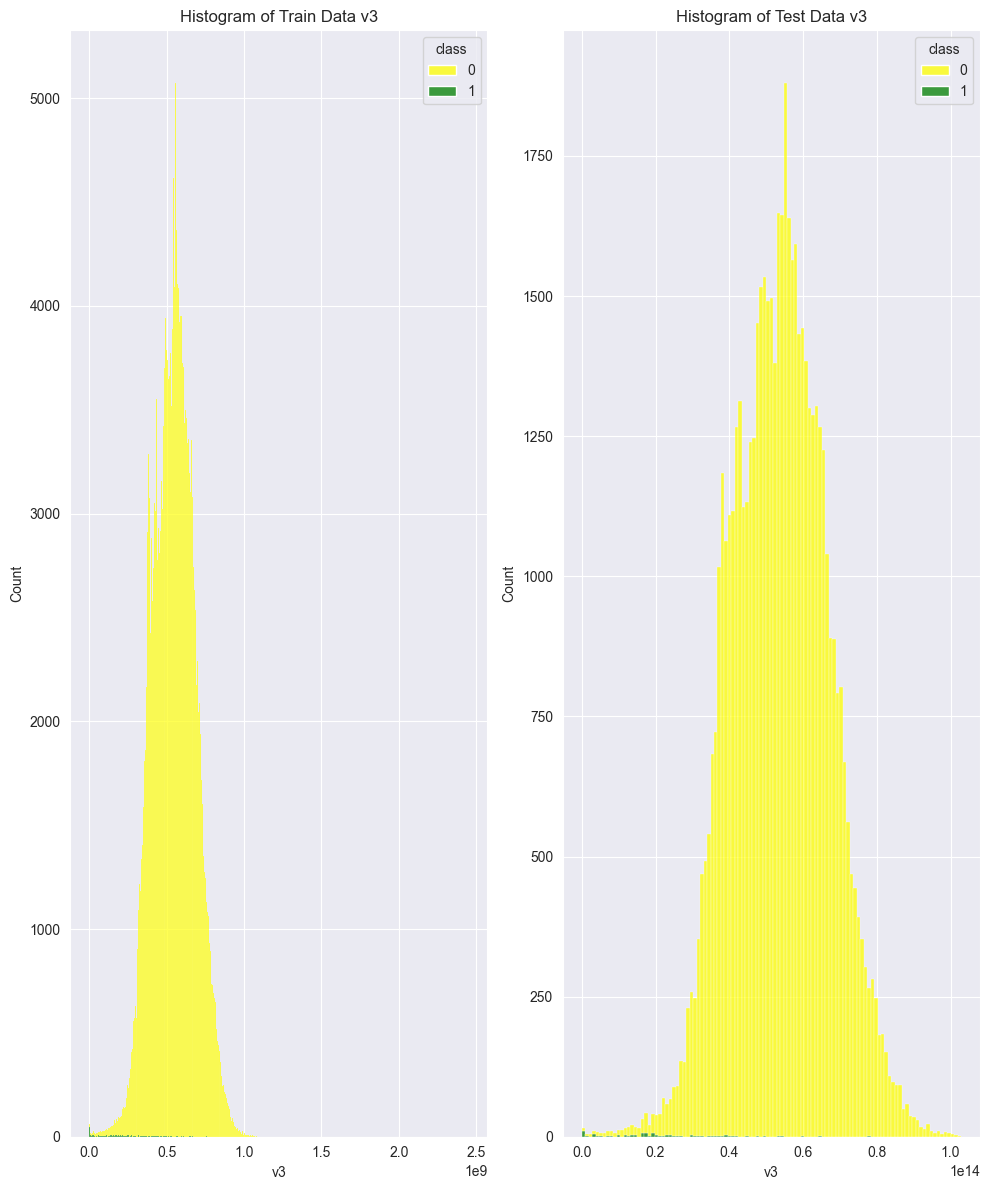

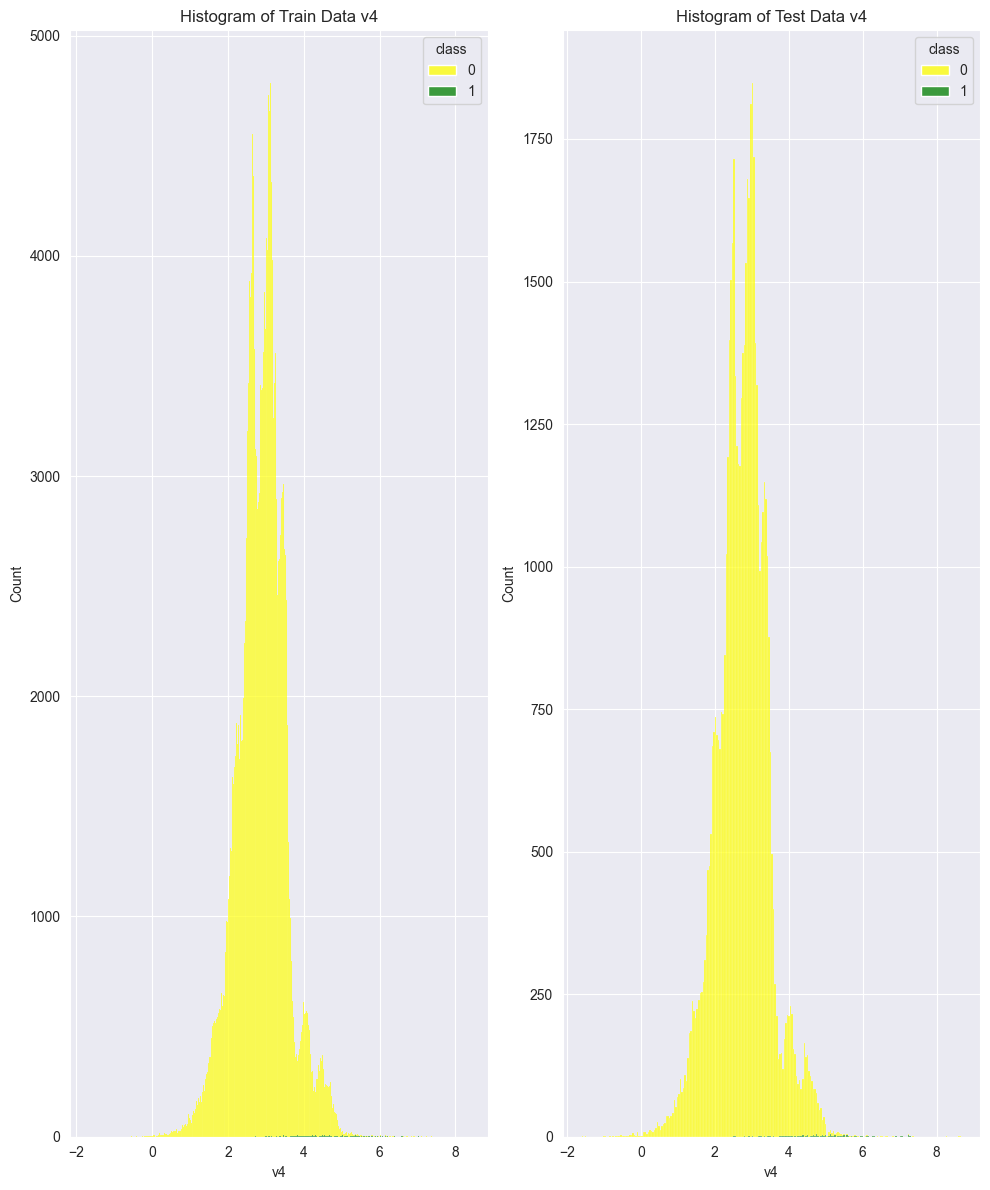

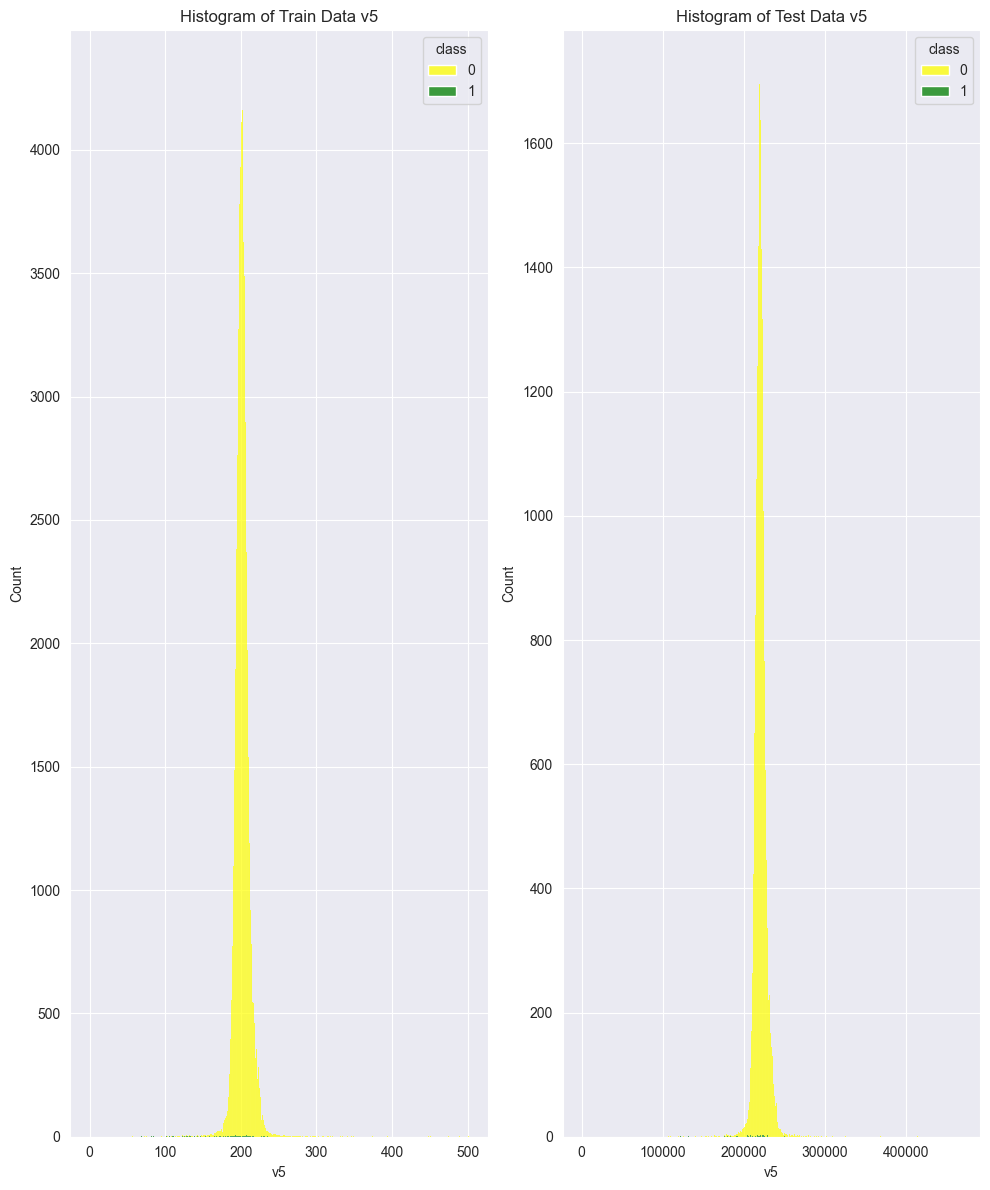

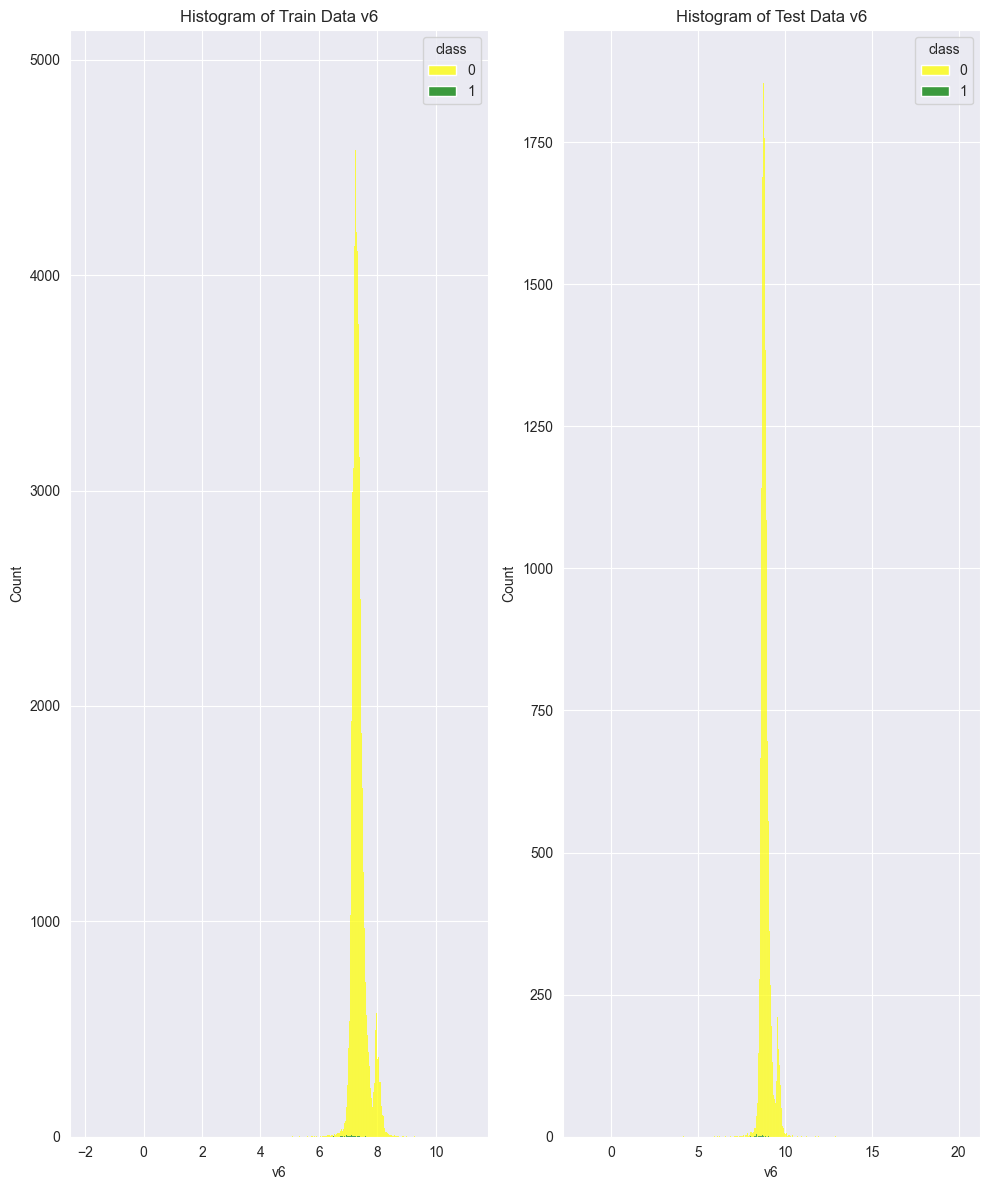

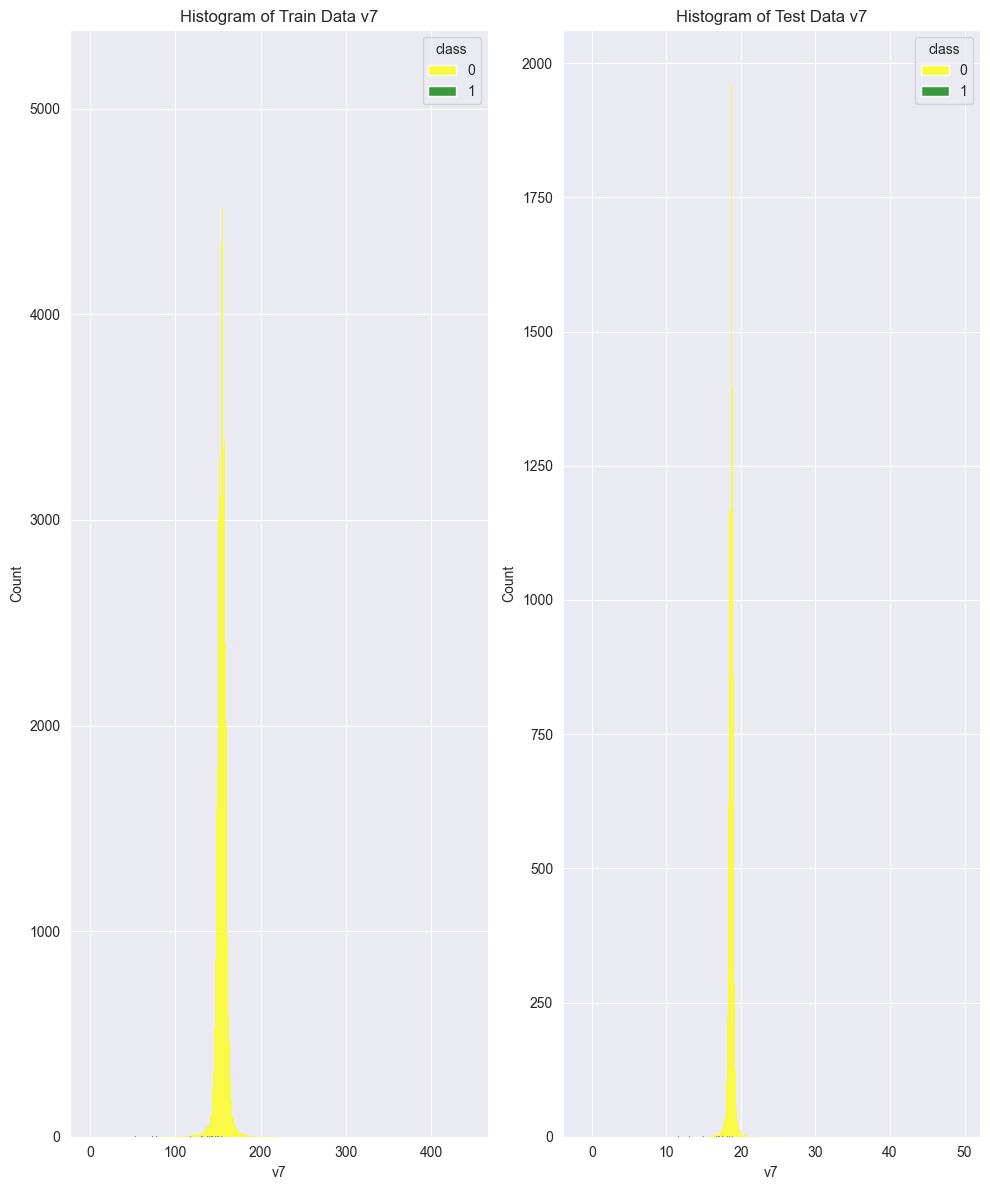

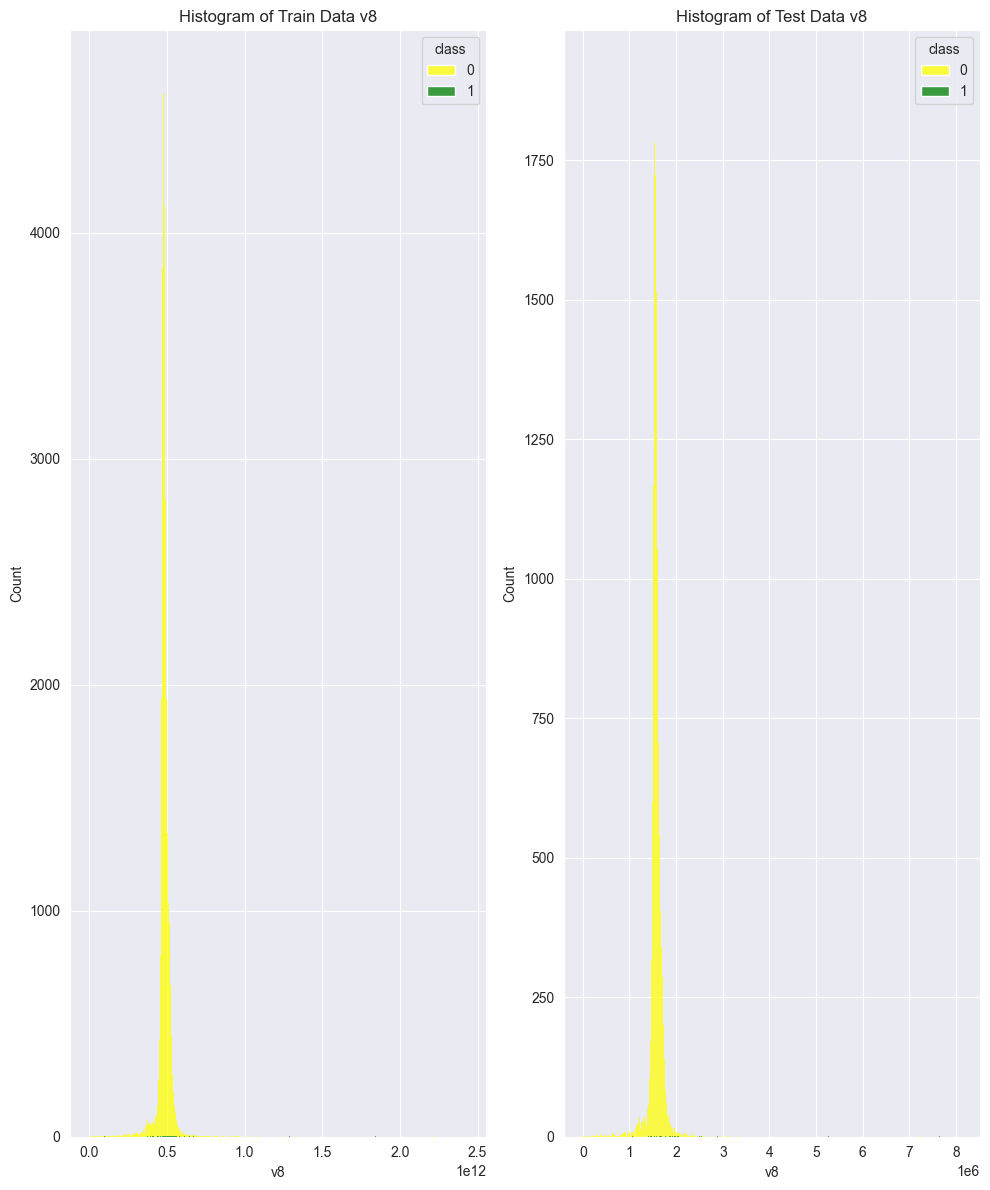

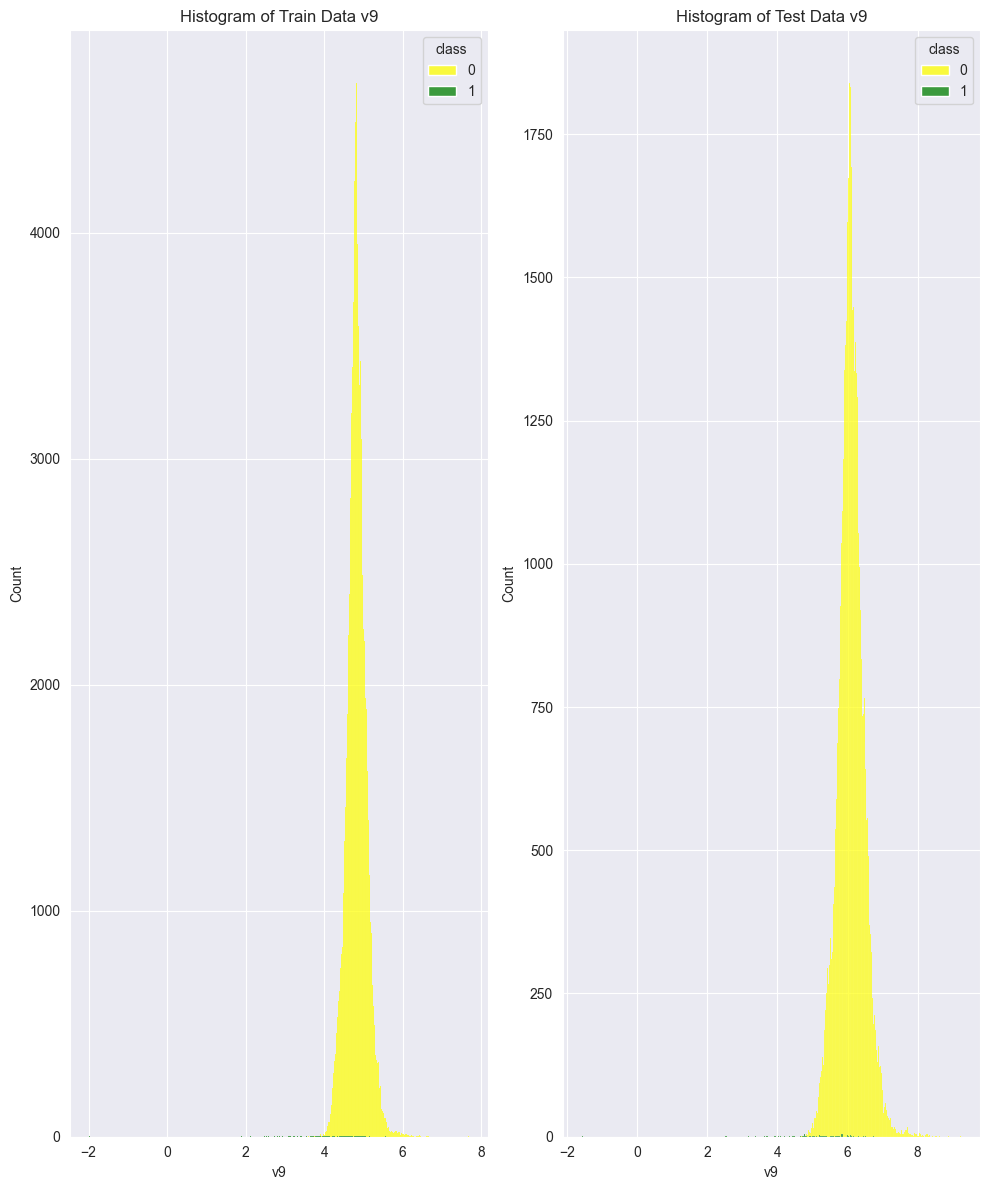

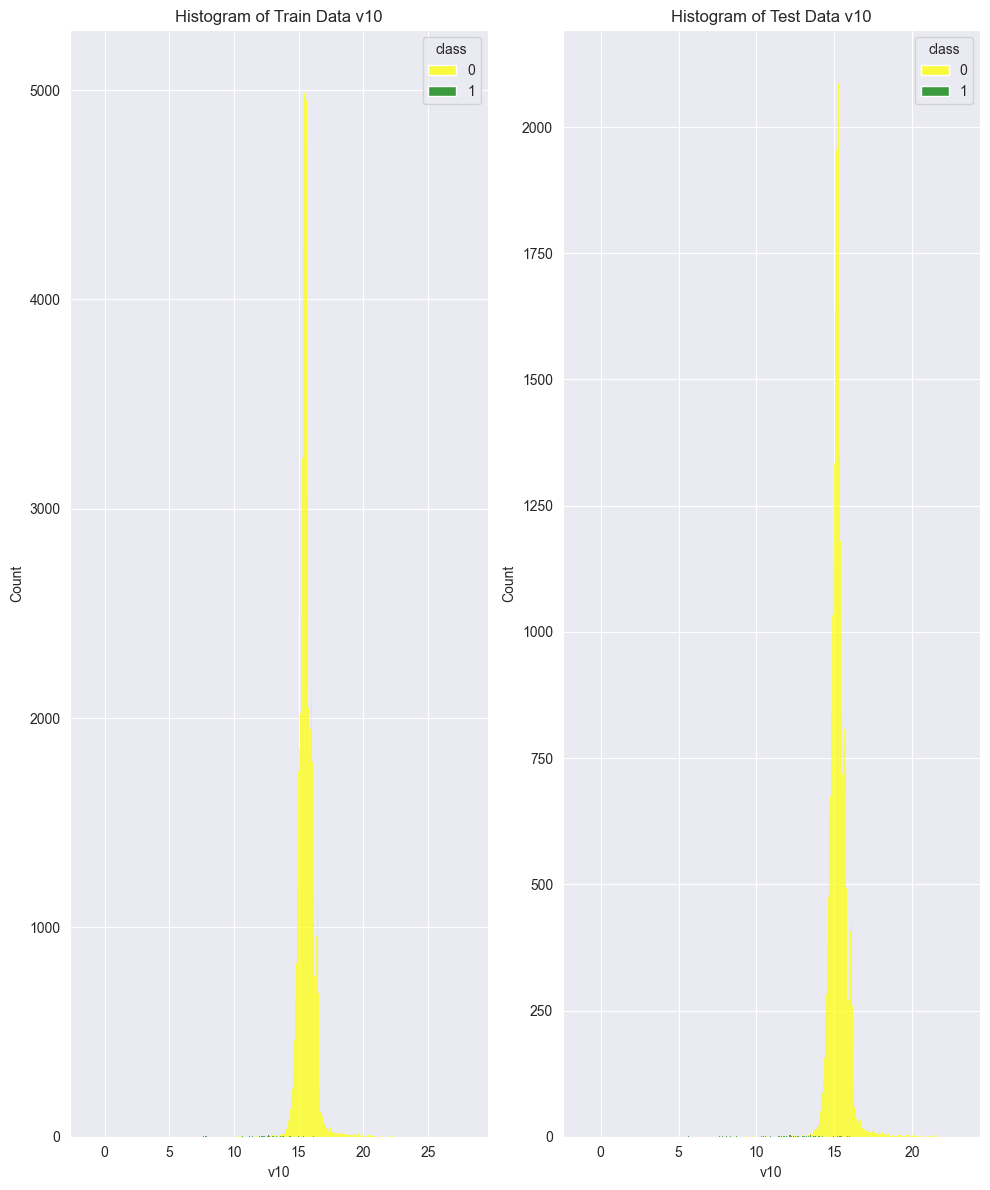

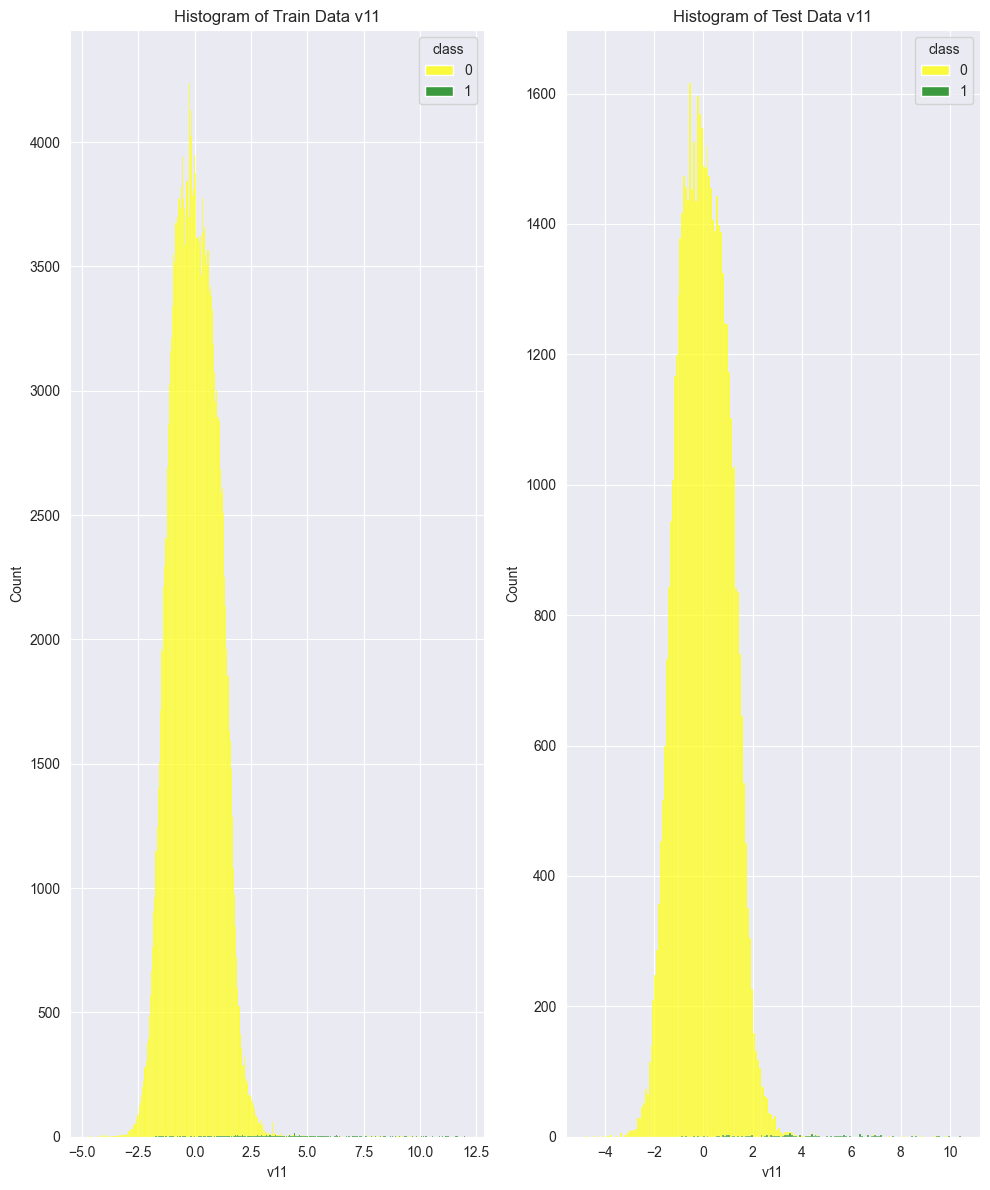

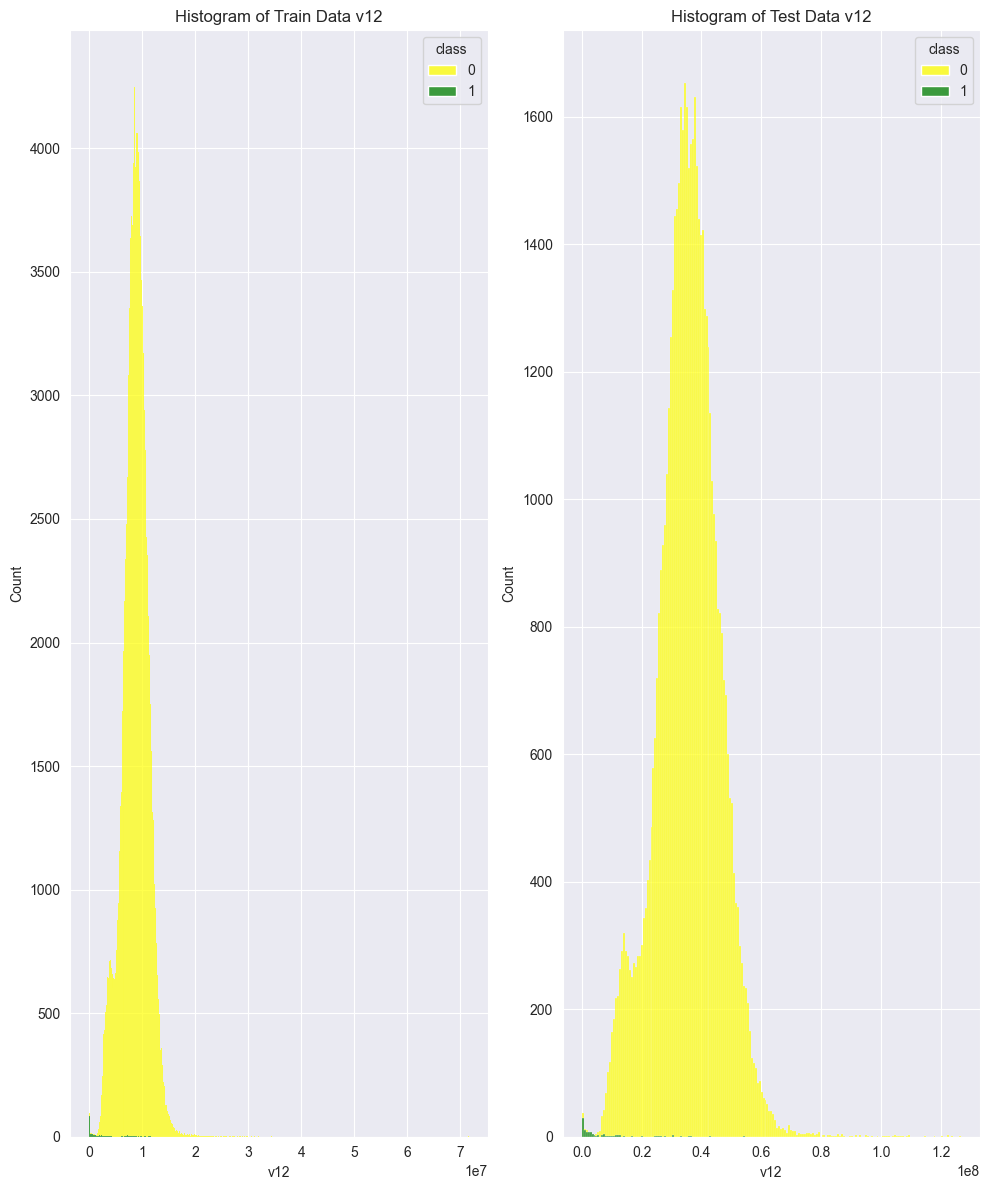

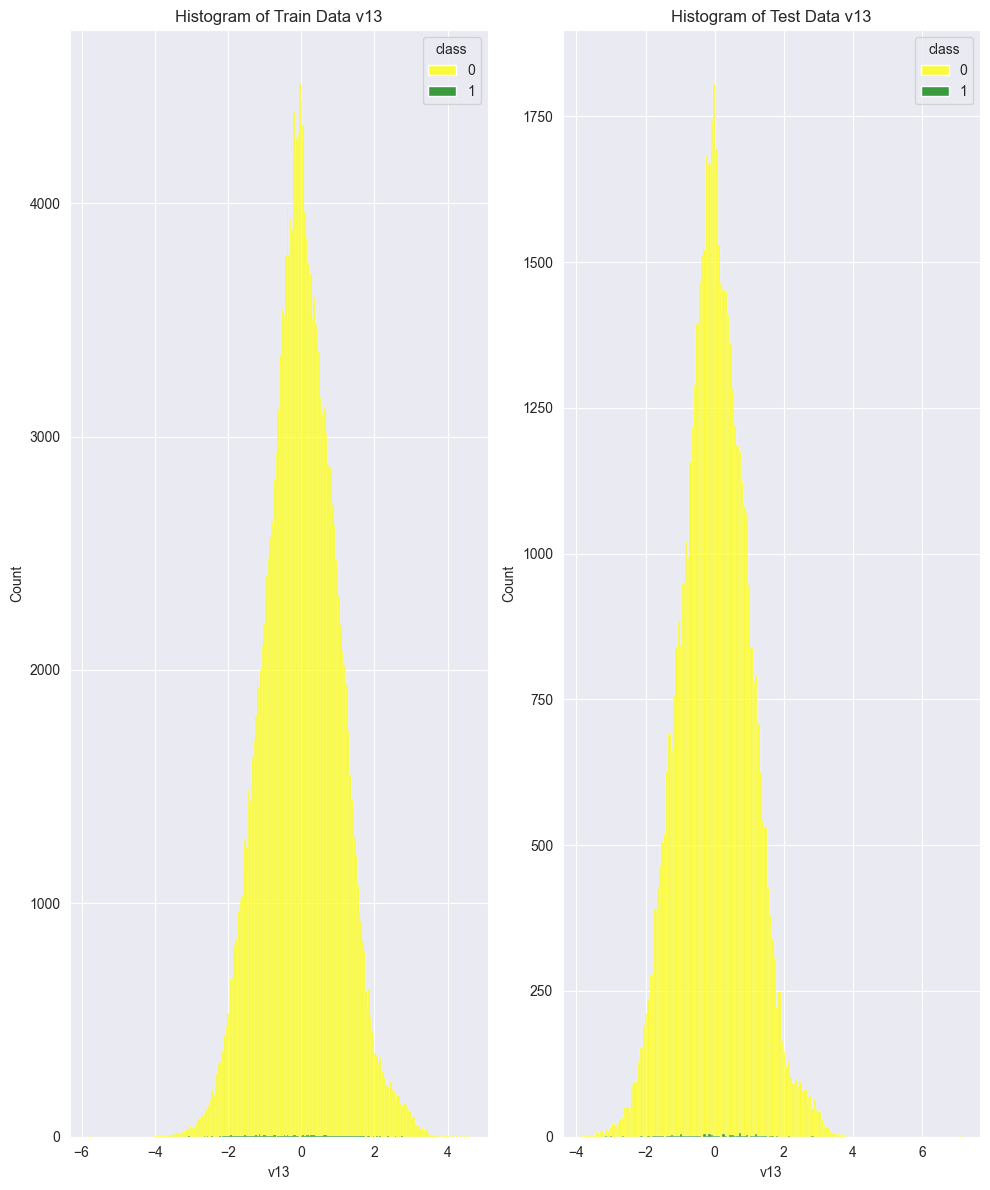

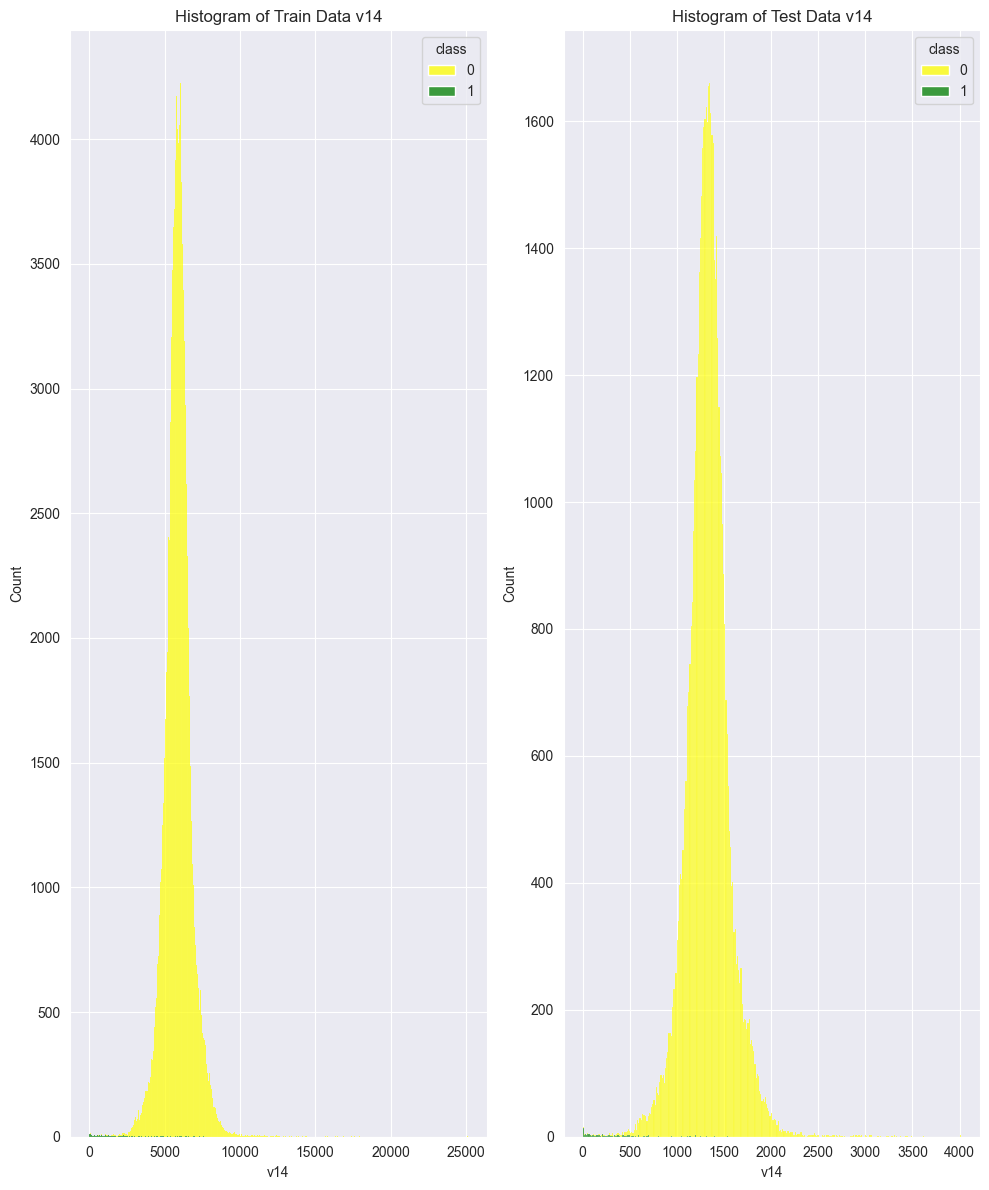

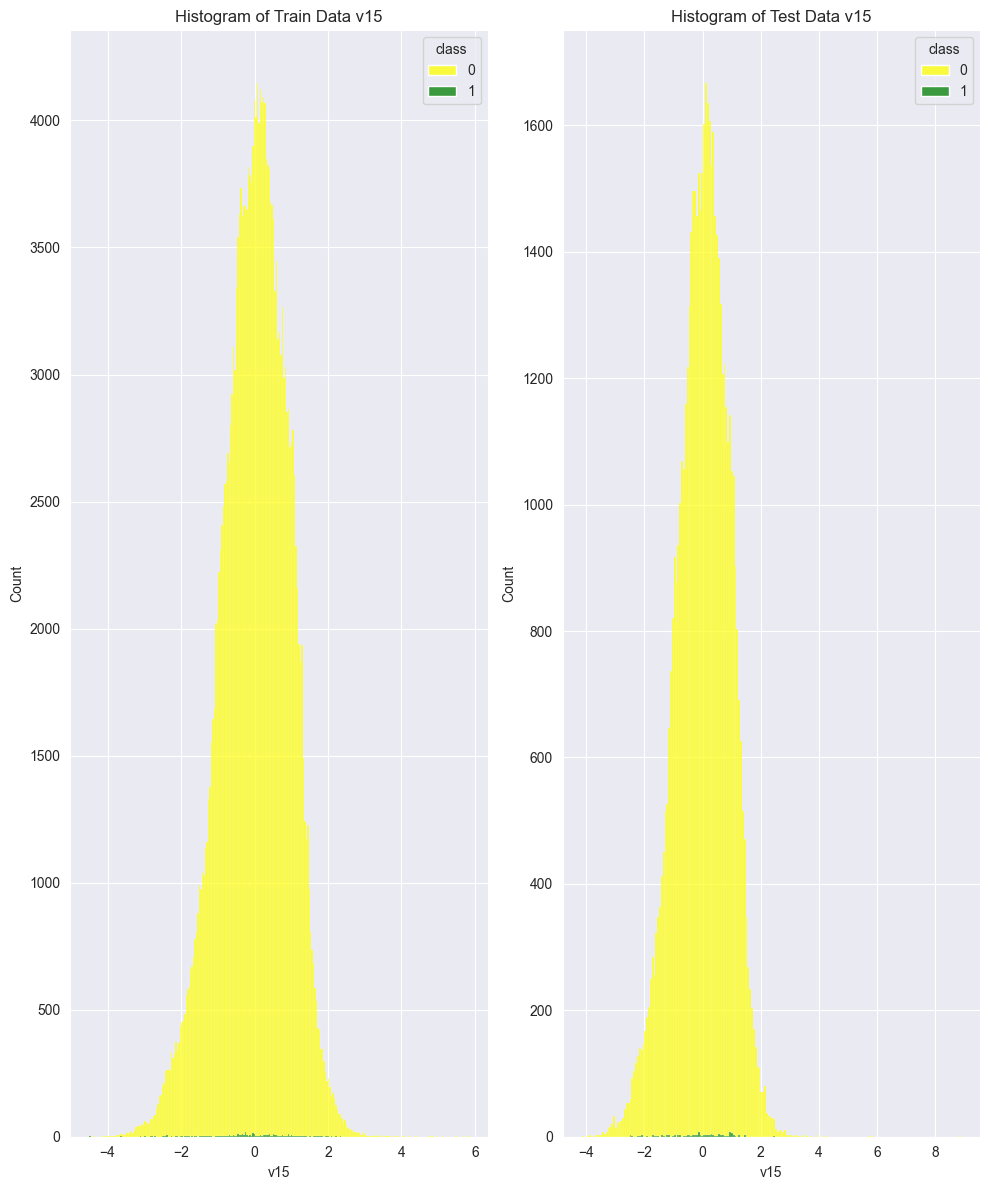

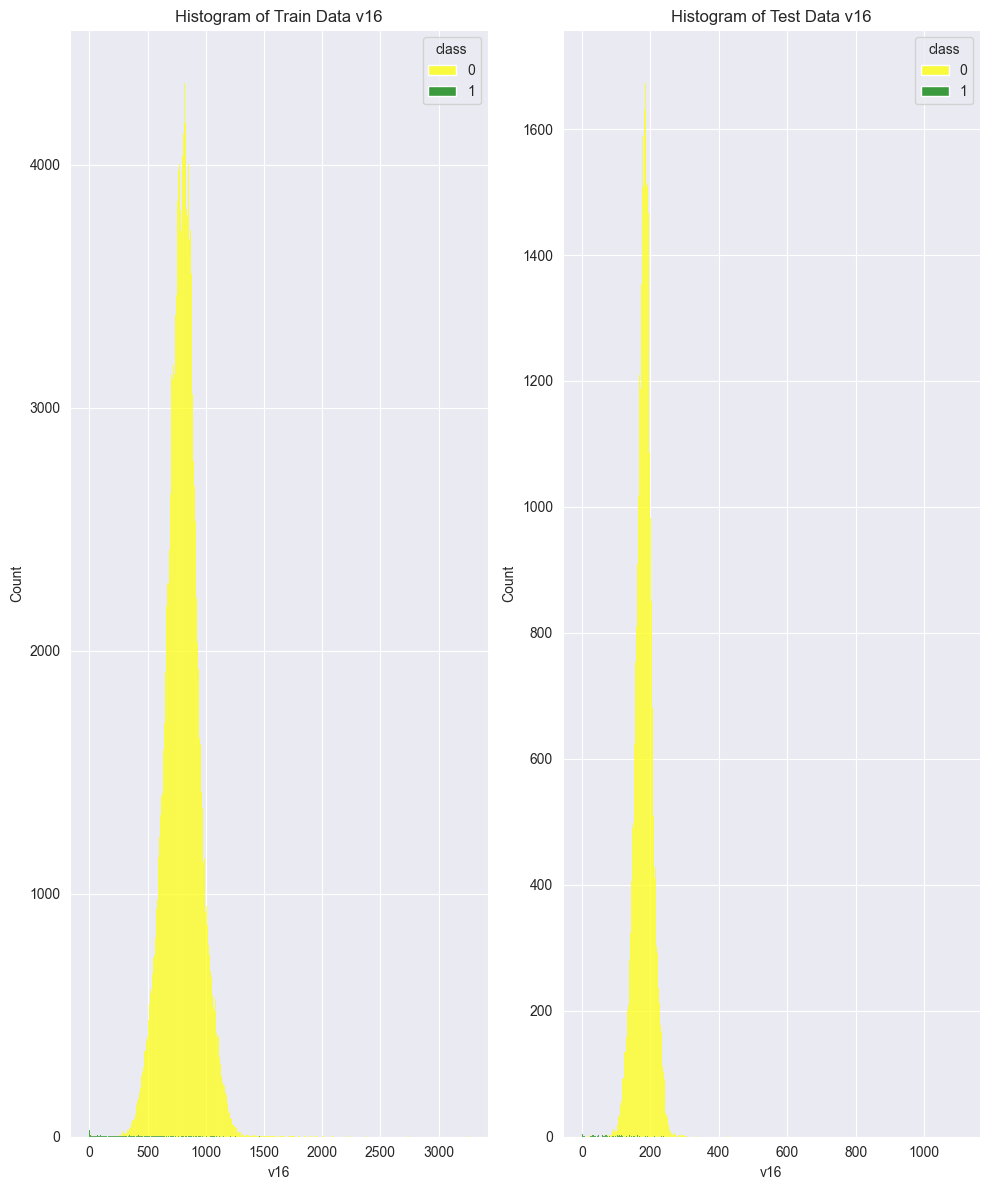

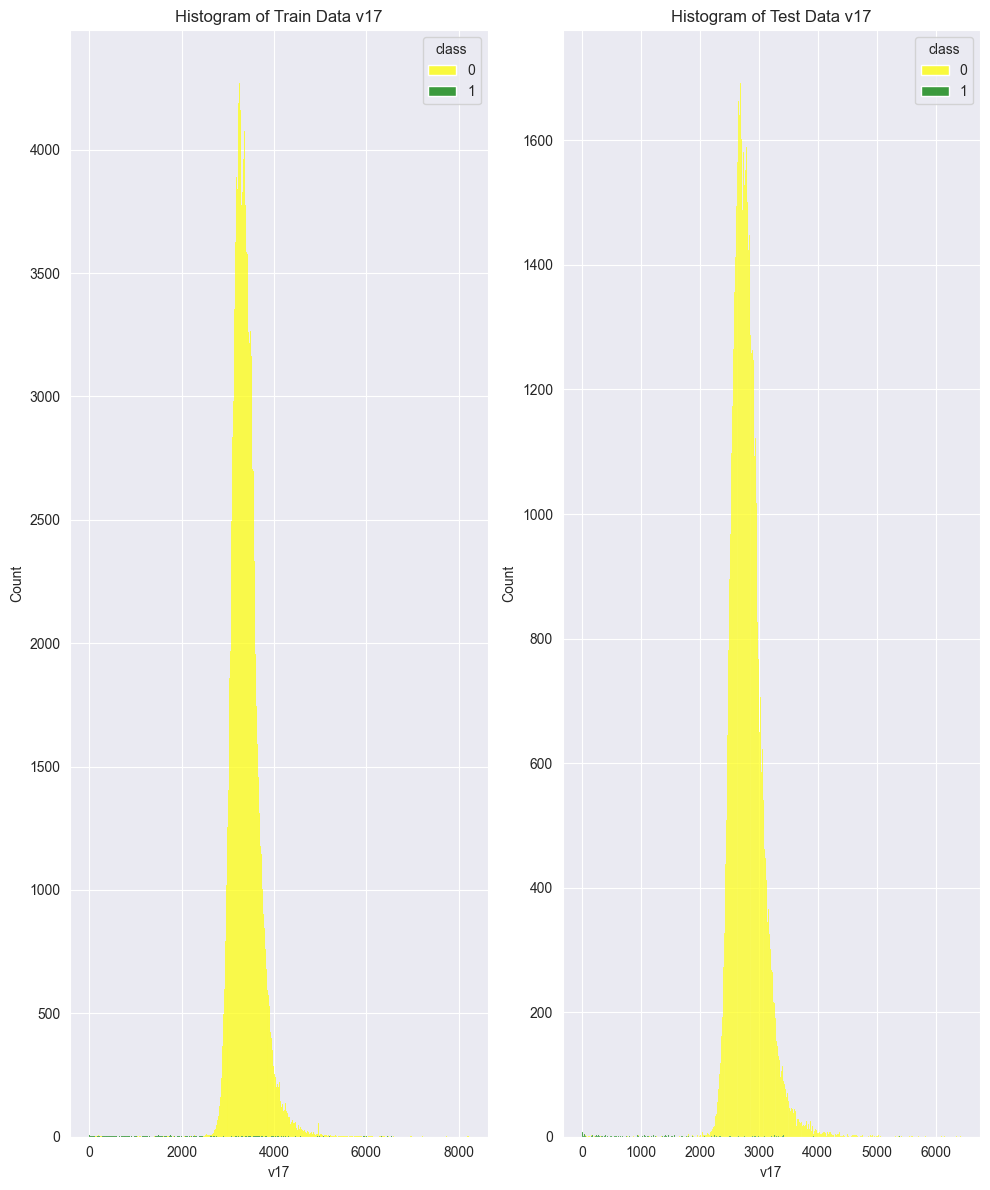

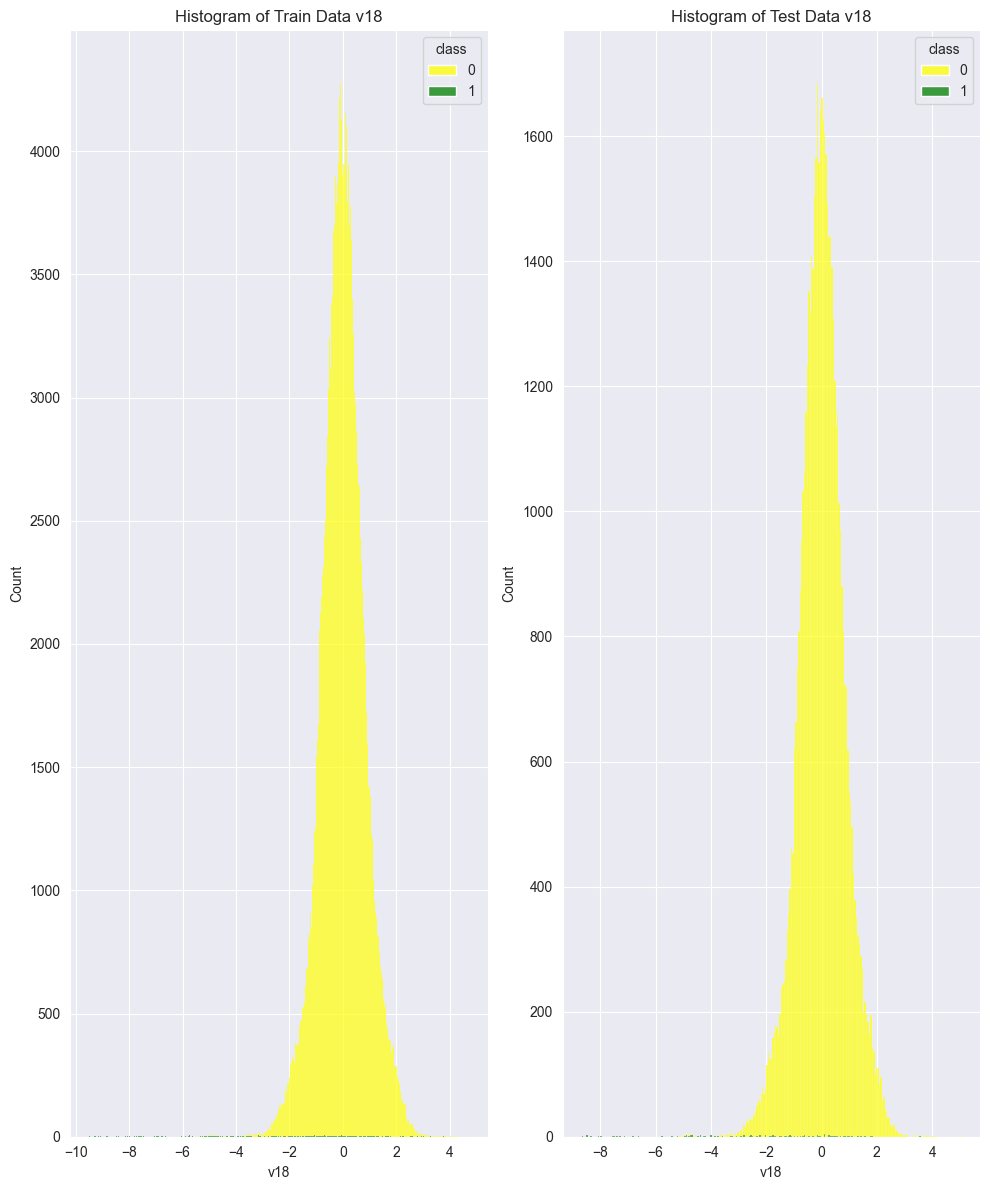

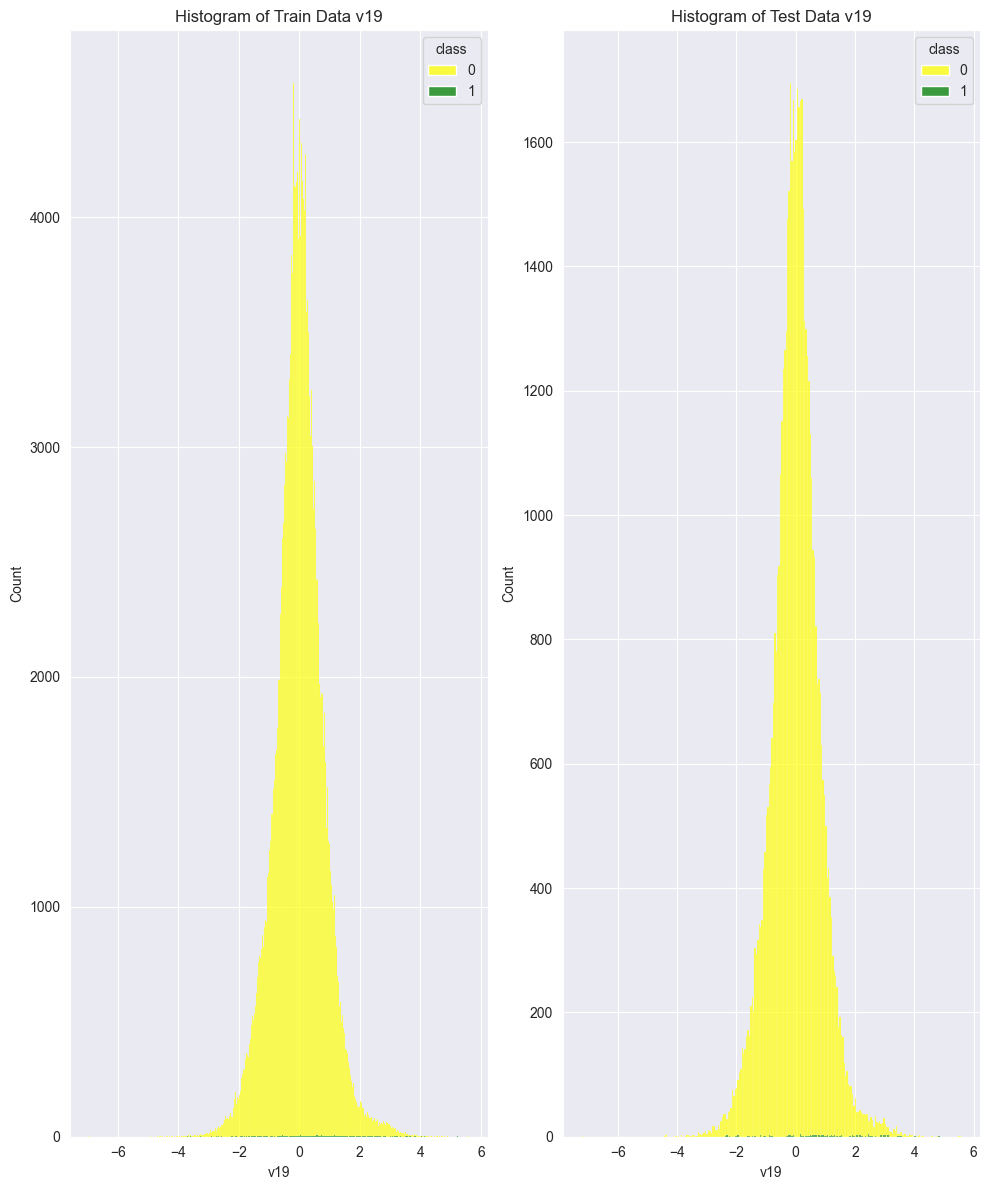

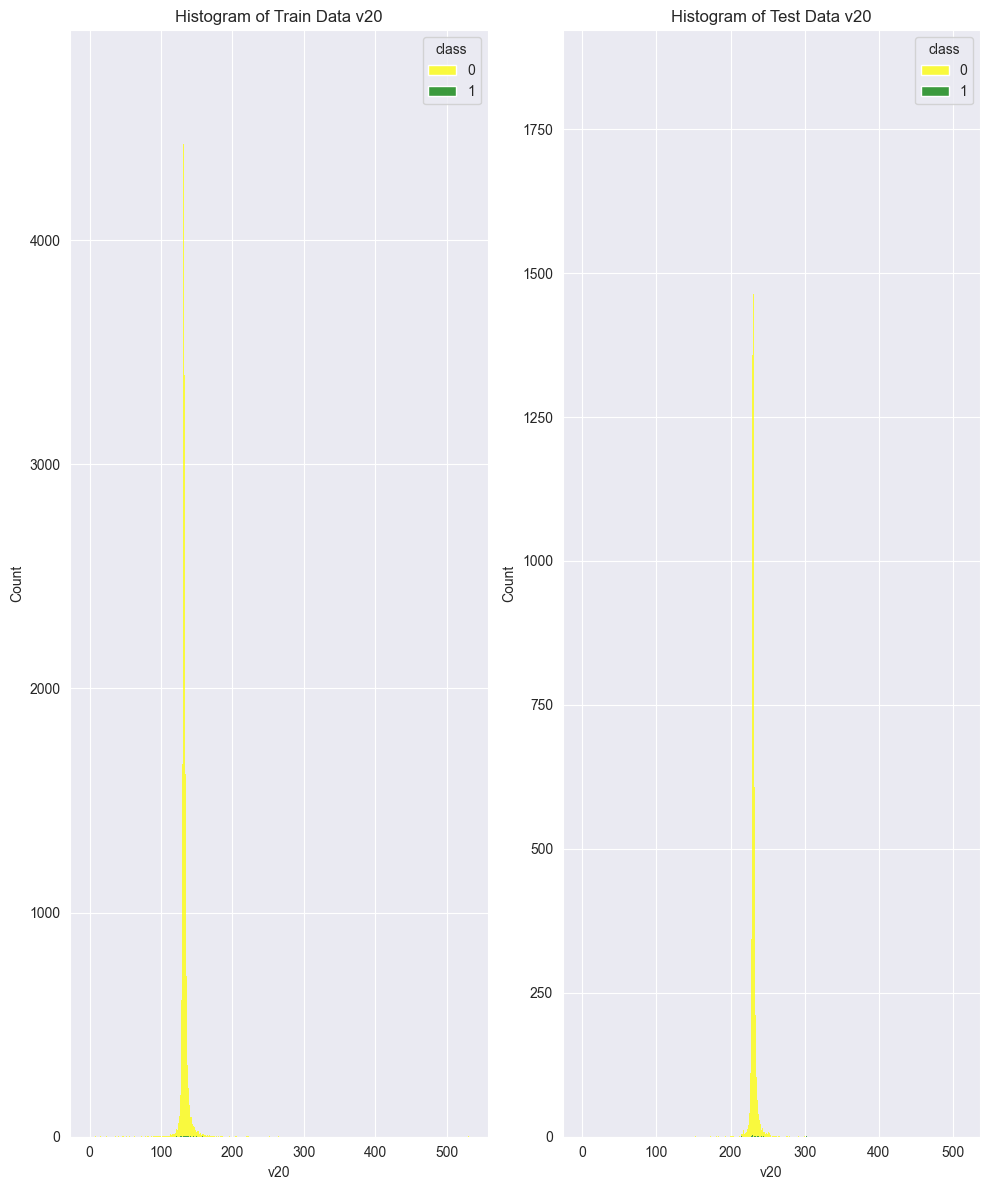

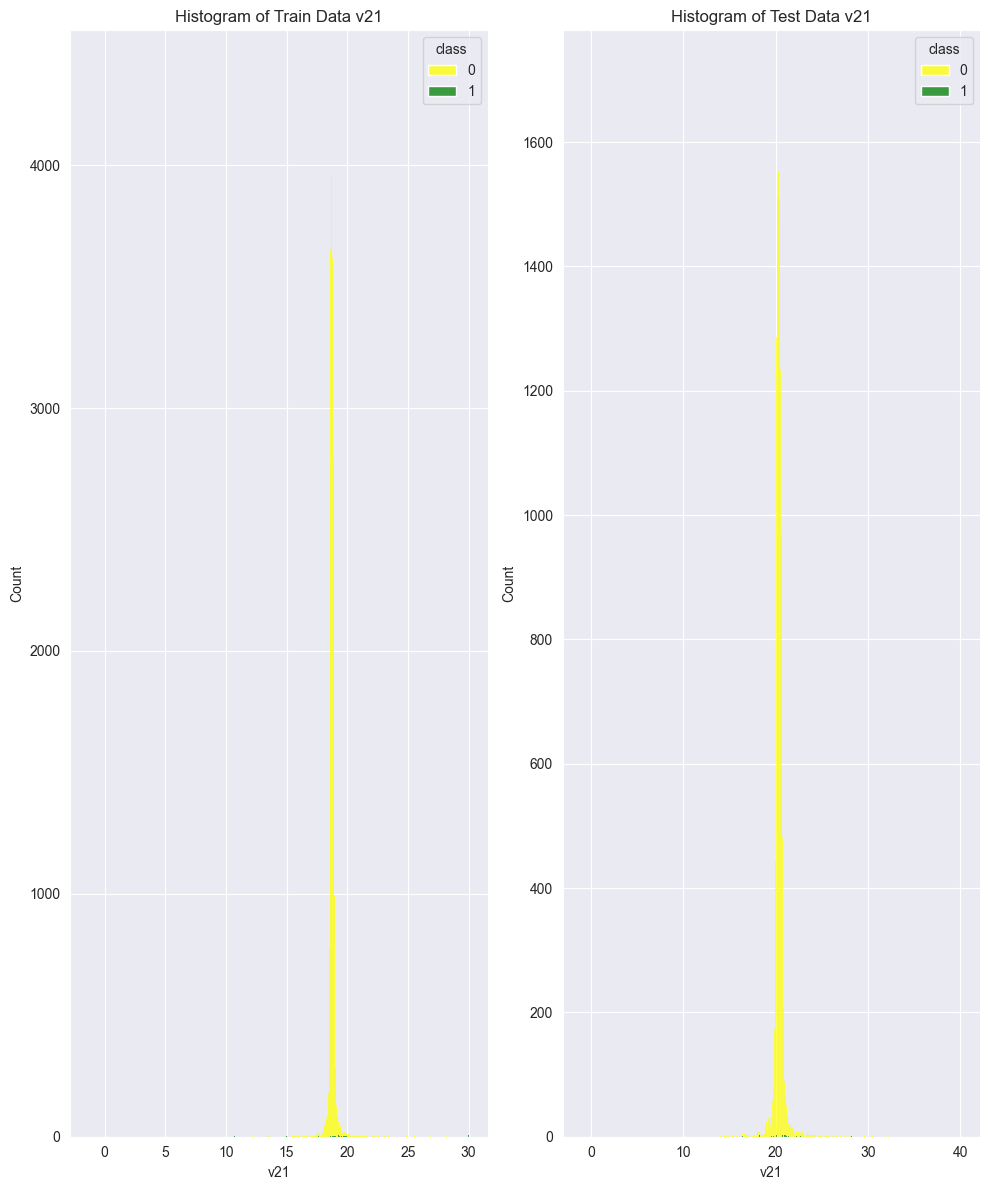

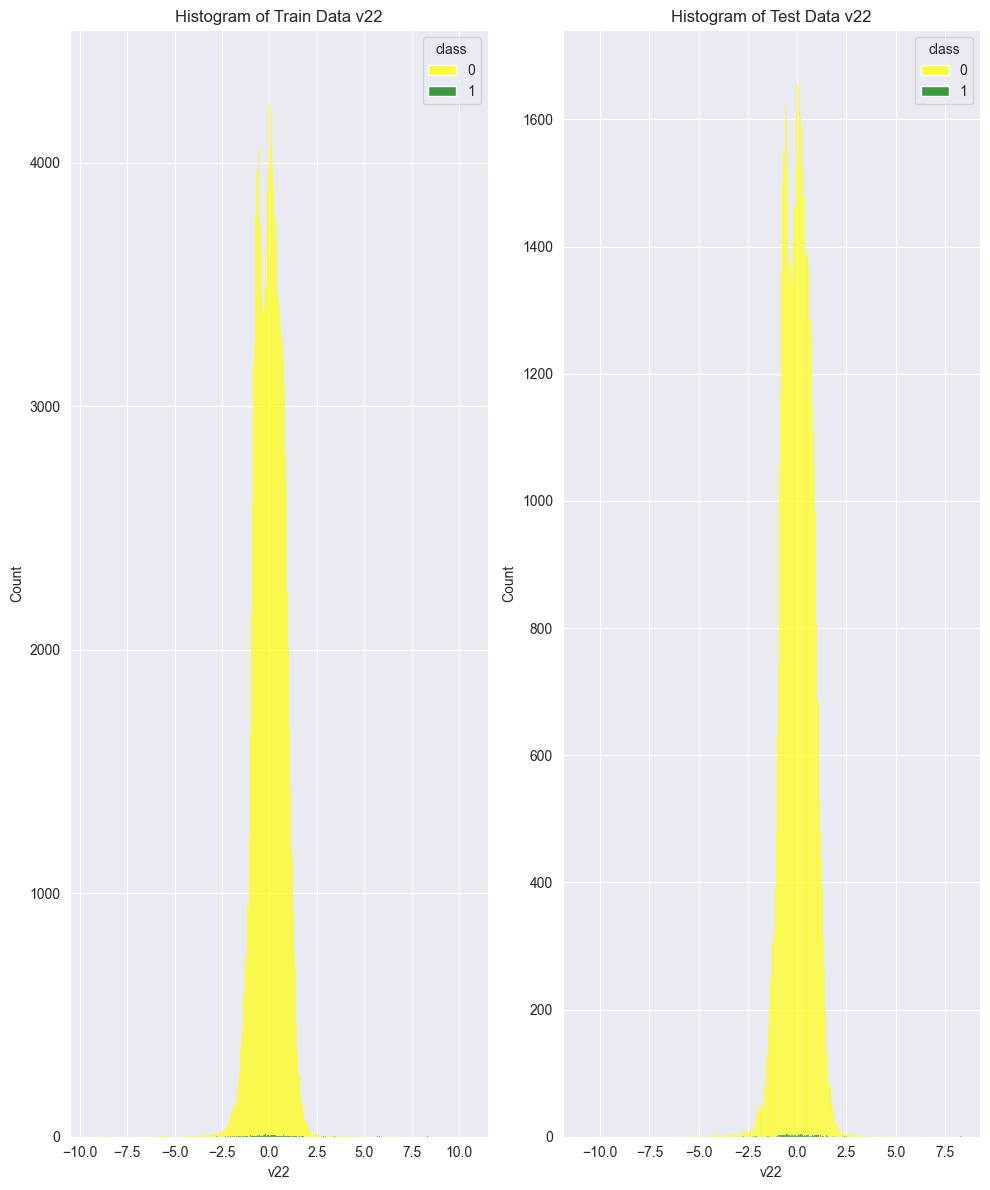

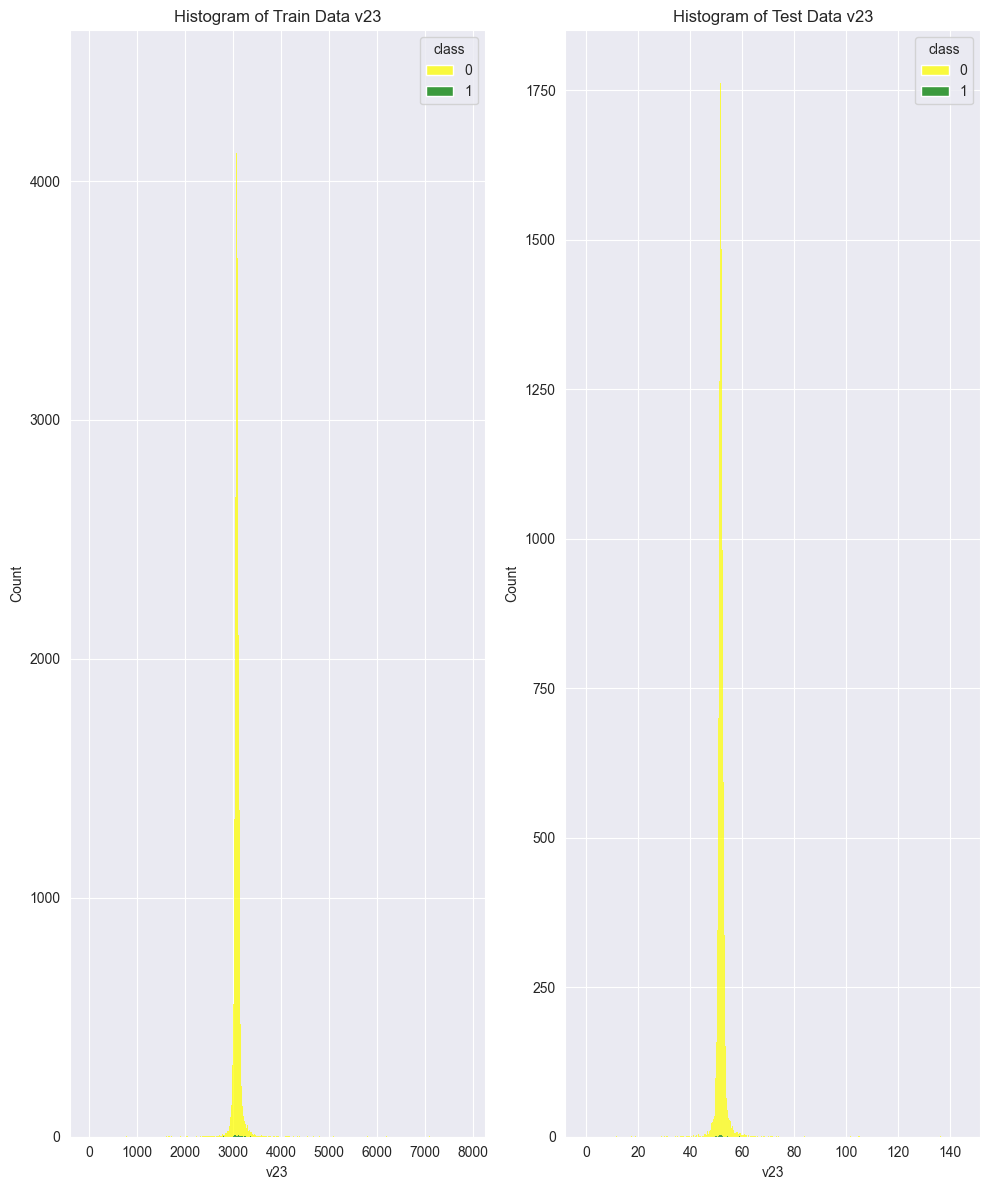

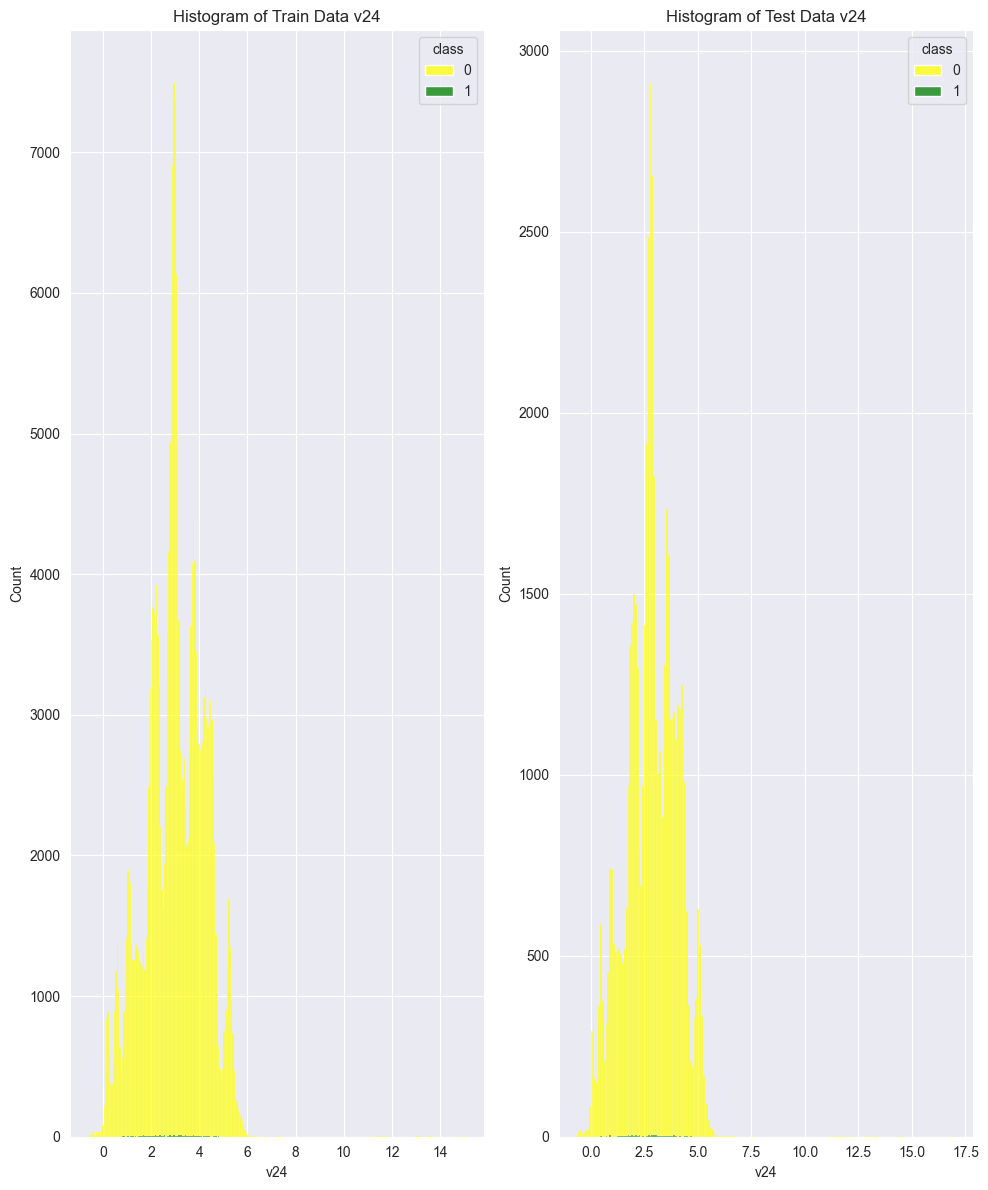

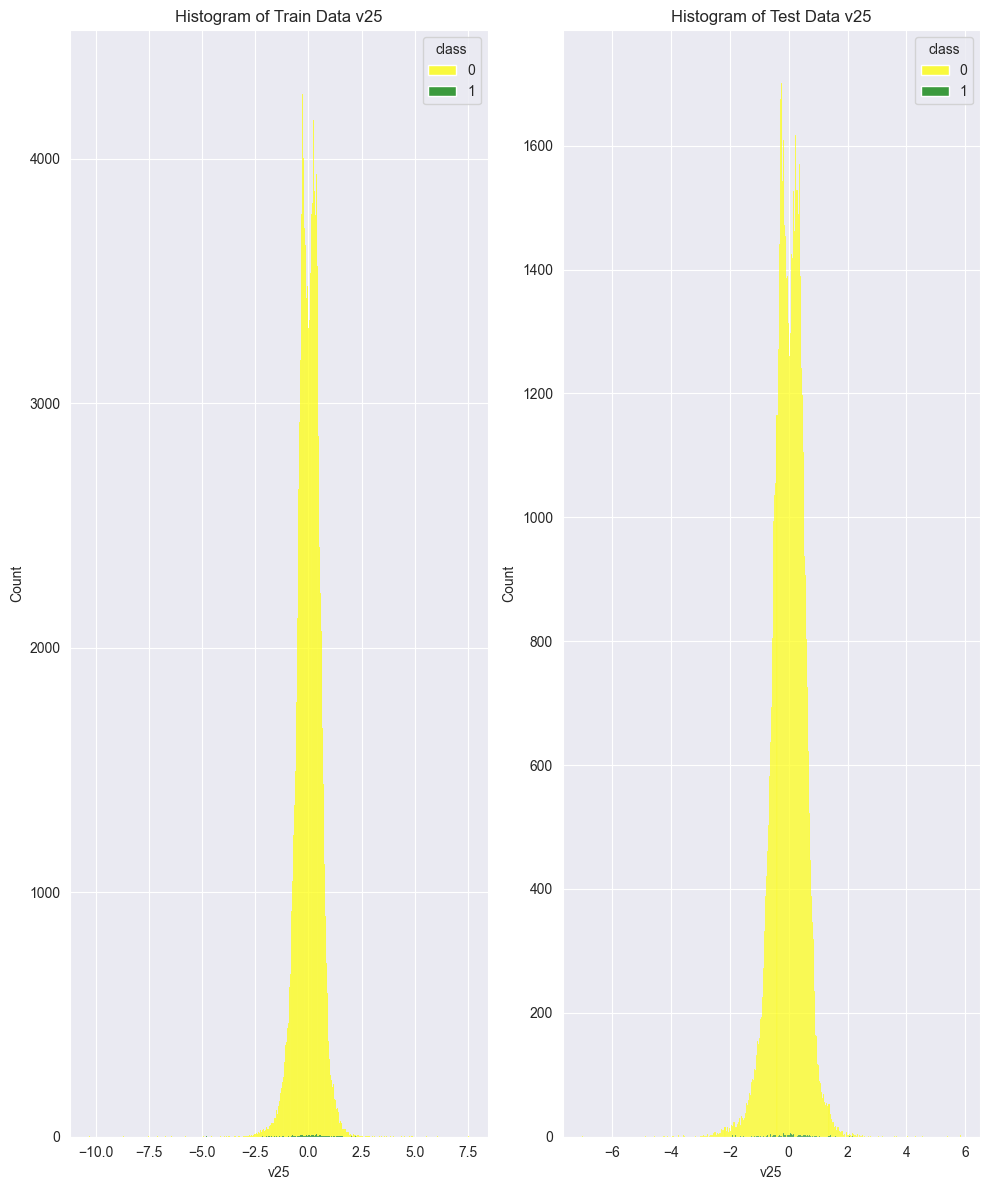

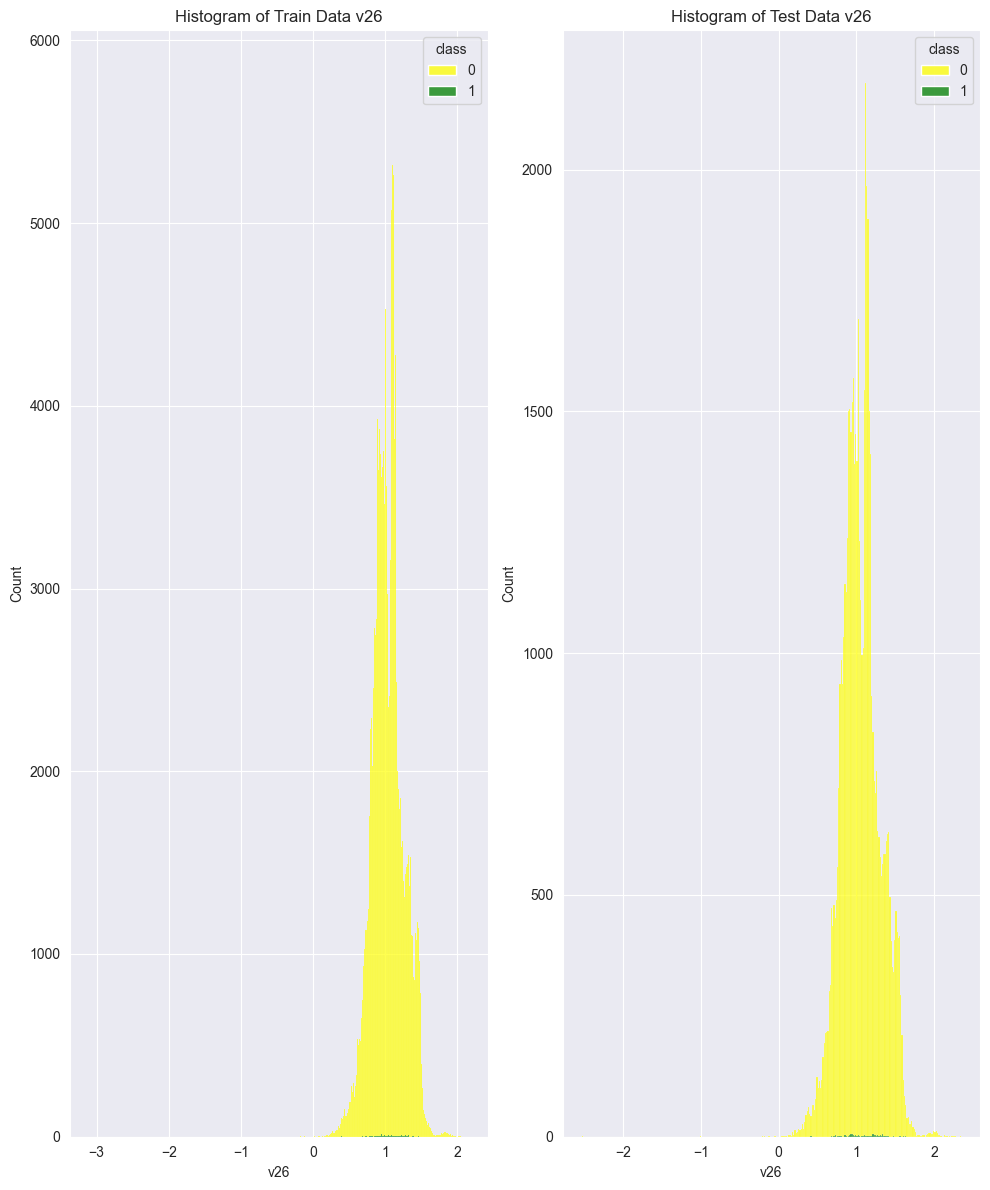

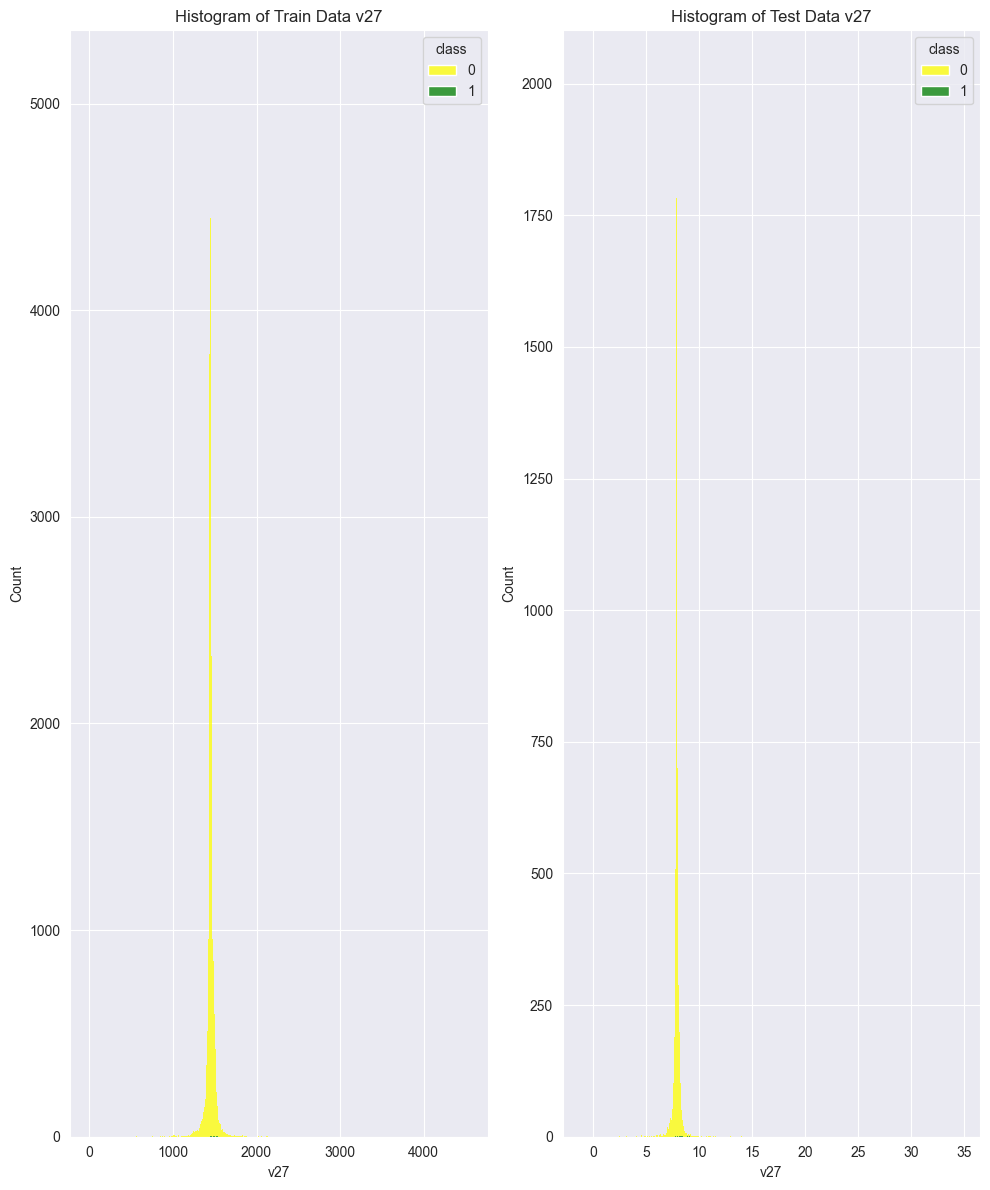

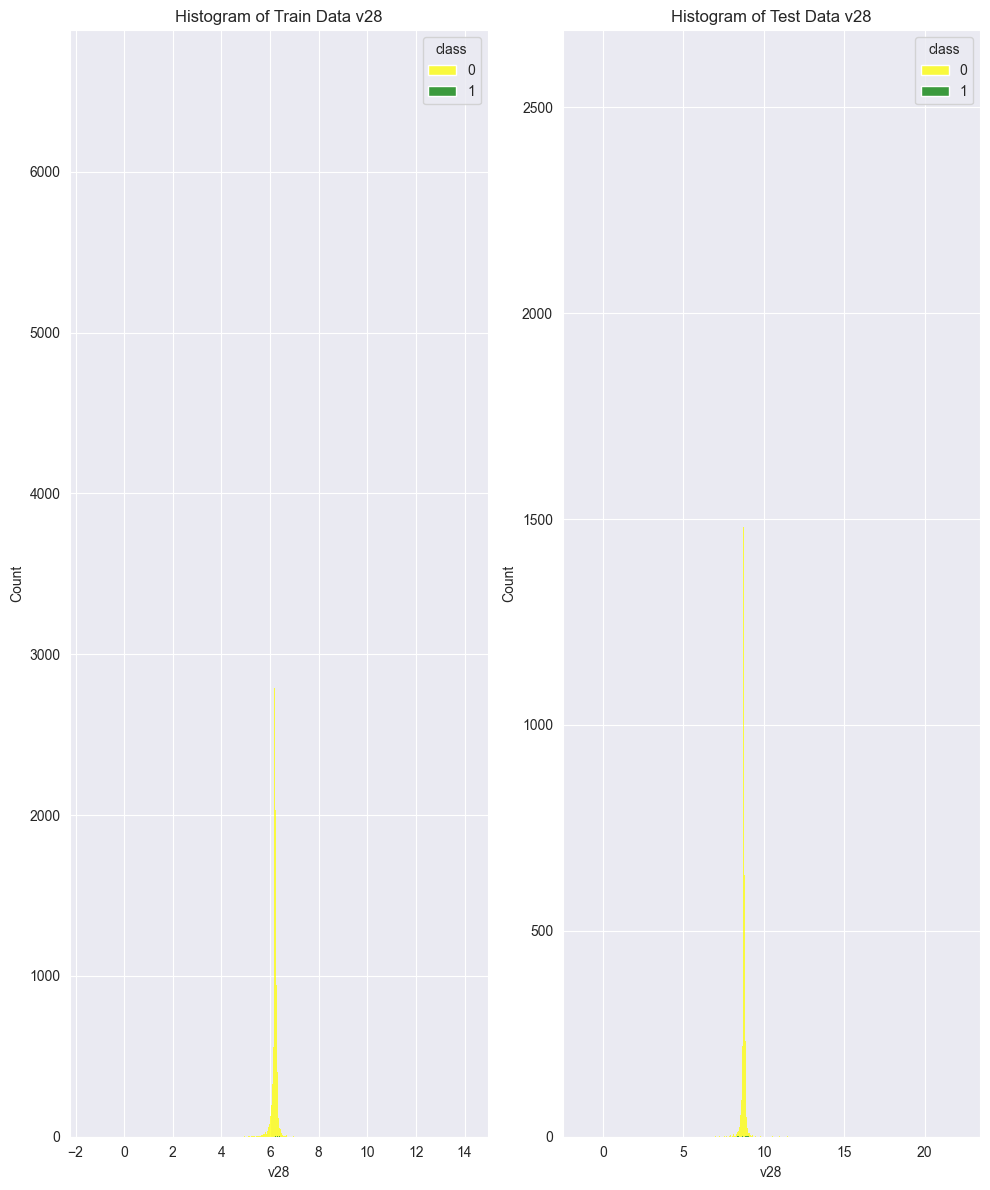

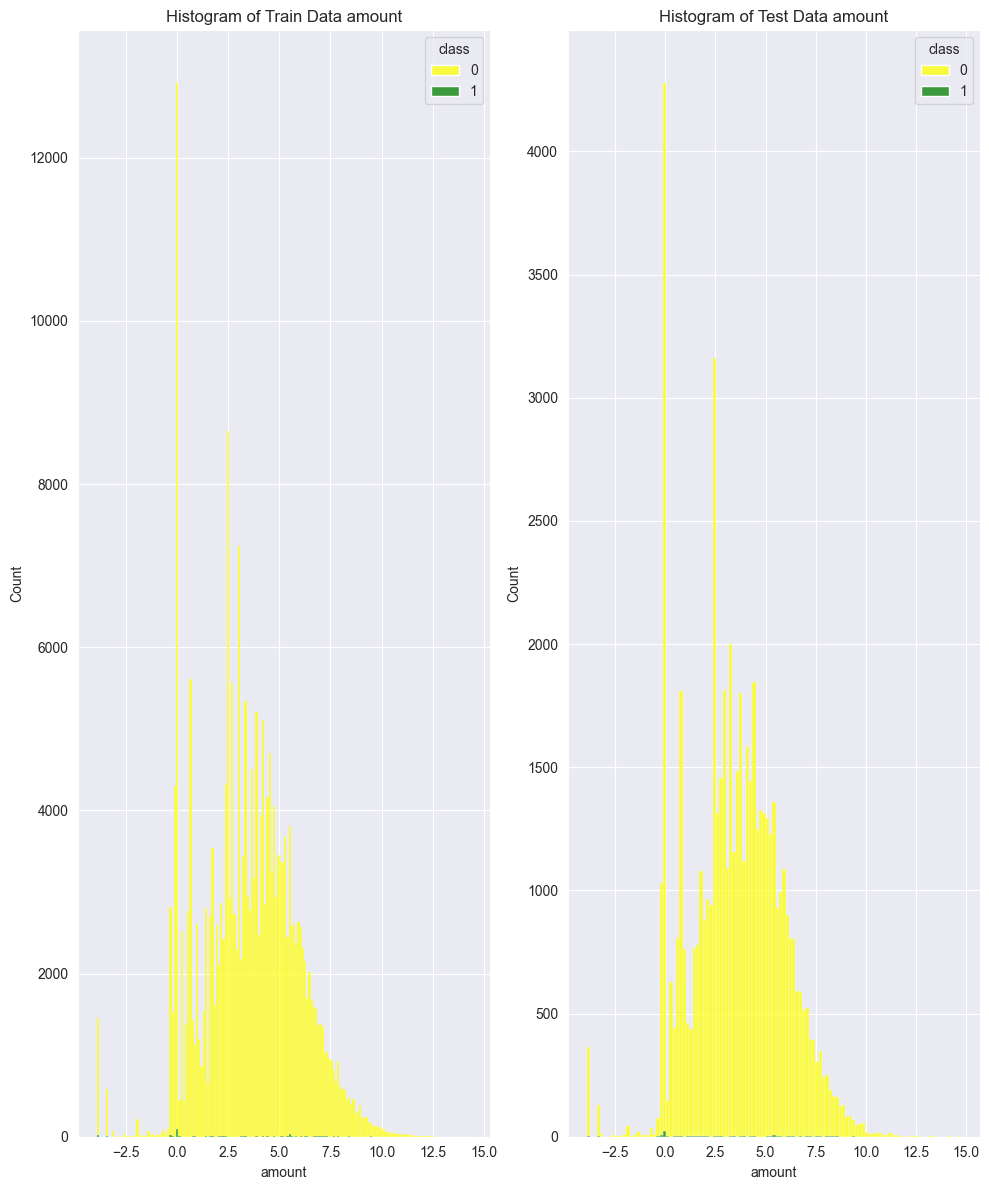

In [23]:
for i in num_featuers:
    multi_hist_plot(df_train,df_test,i)

In [24]:
X_train, X_val, y_train, y_val =df_train.drop([target],axis=1),df_test.drop([target],axis=1),df_train[target],df_test[target]

In [25]:
seed = np.random.seed(6)

# param1 = {'n_estimators': 844, 'max_depth': 5, 'learning_rate': 0.011533926188770152, 
#           'min_child_weight': 0.7353926016580375, 'min_child_samples': 22, 
#           'subsample': 0.7440626280651244, 'subsample_freq': 3
# #           , 'colsample_bytree': 0.5193554106905941
#          }

param1 = {'n_estimators': 844, 'max_depth': 5, 'learning_rate': 0.011533926188770152, 
          'min_child_weight': 0.7353926016580375, 'min_child_samples': 22, 
          'subsample': 0.7440626280651244, 'subsample_freq': 3
#           , 'colsample_bytree': 0.5193554106905941
         }


lgbm_opt = LGBMClassifier(**param1,random_state=seed,device="cpu")
sc=cross_val_score(lgbm_opt,X_train.values,y_train.values,cv=4, scoring = 'roc_auc').mean()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 290, number of negative: 170593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 170883, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001697 -> initscore=-6.377155
[LightGBM] [Info] Start training from score -6.377155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [26]:
print("CV score of LGBM Optuna is ",sc)

CV score of LGBM Optuna is  0.9835162541959089


In [27]:
lgb_model_final = lgbm_opt.fit(X_train.values, y_train.values)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 387, number of negative: 227458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001699 -> initscore=-6.376296
[LightGBM] [Info] Start training from score -6.376296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [28]:
y_pred = lgb_model_final.predict(X_val.values)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [29]:
accuracy_score(y_val, y_pred) 

0.9987008883115059

In [ ]:
y_pred_proba = lgb_model_final.predict_proba(X_val)

In [ ]:
preds = y_pred_proba.argmax(axis=1)

accuracy = accuracy_score(y_val, y_pred)*100
print('accurecy :', str(accuracy))
cm = confusion_matrix(y_val, preds, labels=[ 0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0','1'])
disp.plot()